In [ ]:
%%time
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import random
random.seed(27)
np.random.seed(27)

CPU times: user 372 ms, sys: 133 ms, total: 505 ms
Wall time: 389 ms


In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [ ]:
data.head(4)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,8.287300e+04,82871.000000,81870.000000,7.321700e+04,73375.000000,81870.000000,82425.000000,82423.000000,81427.000000,72782.000000,72940.000000,81427.000000,68578.000000,8675.000000,8675.000000,10805.000000,10805.000000,789.000000,789.000000,1295.000000,1295.000000,3.893300e+04,3.863900e+04,38639.000000,38933.000000,4.461300e+04,44613.000000,42904.000000,42311.000000,9.285000e+03,8.663000e+03,6.361000e+03,7.873000e+03,1.498000e+04,9285.000000,8663.000000,6361.000000,14980.000000,72146.000000,8.441600e+04,79079.000000,76522.000000,75648.000000,76093.000000,76858.000000,52325.000000,77450.000000,78586.000000,60686.000000,59791.000000,38912.000000,70681.000000,80635.000000,77332.000000
mean,8.211374e+05,5789.199780,5763.550925,2.292438e+04,138.790501,122.773939,10011.629448,74.198657,74.200625,223.954567,1.506114,1.333257,1.019672,1081.053602,26.410116,4812.408607,173.831957,280.666809,21.120923,3973.550944,115.494818,4.397766e+04,5.956531e+06,227.379280,1.936969,4.138407e+04,1.775408,0.088971,159.455343,1.425028e+07,8.848447e+06,4.540923e+06,4.172334e+05,2.190122e+05,13.200928,9.262473,5.023012,2769.555874,58.732497,1.284529e+08,348.989521,30.522941,8.773785,5.557450,19138.933252,13.347088,257.767329,7.820310,10.520627,32.656942,50.917796,3.029655,73.165406,0.727137
std,5.680325e+06,36121.370409,35390.090481,1.355333e+05,757.272490,692.060634,19211.247507,175.426562,148.977447,393.176027,3.979526,2.935088,0.357328,3028.429809,27.882287,12419.377760,216.457519,588.427993,37.119425,11614.198048,230.476267,2.279194e+05,2.699337e+07,495.282442,15.291277,1.482600e+05,4.810876,0.097594,864.928764,6.521138e+07,3.737955e+07,1.785948e+07,1.662442e+06,1.119634e+06,21.512844,13.707516,9.532868,4641.192003,21.670371,6.905336e+08,1699.448288,9.114838,6.224202,4.249094,19821.326771,19.942356,118.760682,3.976434,10.402971,13.475076,31.763319,2.463600,7.549413,0.150057
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.391720e+05,0.000000e+00,0.000000,-23.010000,0.000000e+00,0.000000,0.000000,1.300000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,9.260000e+02,2.000000,6.857000,4.400000e+01,0.000000,0.000000,201.796000,0.187000,1.150000,6.857000,0.000000,0.000000,0.860000,30.500000,4.382000,111.000000,22.615000,7.935000,1.781000,59.310000,10.096500,1.432000e+03,1.245195e+05,11.190000,0.124000,1.466000e+03,0.123000,0.016000,7.700000,6.133000e+04,5.157650e+04,2.536900e+04,3.208000e+03,9.550000e+02,1.040000,0.890000,0.420000,322.000000,44.440000,2.416664e+06,36

In [ ]:
data.describe(include="object")

,iso_code,continent,location,date,tests_units
count,84964,80862,84964,84964,46066
unique,219,6,219,486,4
top,ARG,Africa,Mexico,2021-04-09,tests performed
freq,485,22201,485,218,28547


In [ ]:
new_data_=data[data['location']=='Denmark'].reset_index()
new_data=new_data_.iloc[25: , : ].reset_index() 
new_data.head()     #EXTRACTING DATA FOR Denmark COUNTRY 

,level_0,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,25,20745,DNK,Europe,Denmark,2020-02-27,1.0,1.0,NaN,NaN,NaN,NaN,0.173,0.173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0,158.0,0.027,0.019,21.0,0.004,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94
1,26,20746,DNK,Europe,Denmark,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.173,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,220.0,0.038,0.011,30.0,0.005,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94
2,27,20747,DNK,Europe,Denmark,2020-02-29,3.0,2.0,NaN,NaN,NaN,NaN,0.518,0.345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,294.0,0.051,0.013,41.0,0.007,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94
3,28,20748,DNK,Europe,Denmark,2020-03-01,4.0,1.0,NaN,NaN,NaN,NaN,0.691,0.173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.995,0.172,49.0,343.0,0.059,0.008,47.0,0.008,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94
4,29,20749,DNK,Europe,Denmark,2020-03-02,4.0,0.0,NaN,NaN,NaN,NaN,0.691,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,423.0,0.073,0.014,58.0,0.010,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94


**Denmark reported its first COVID-19 case on 27th Feb ,2020 **

In [ ]:
new_data.shape

(428, 61)

In [ ]:
new_data.tail(5) 

,level_0,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
423,448,21168,DNK,Europe,Denmark,2021-04-25,248316.0,612.0,712.857,2476.0,1.0,2.857,42870.735,105.659,123.072,427.471,0.173,0.493,0.98,40.0,6.906,181.0,31.249,NaN,NaN,189.003,32.631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1801121.0,1222243.0,578878.0,20477.0,31937.0,31.10,21.10,9.99,5514.0,NaN,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94
424,449,21169,DNK,Europe,Denmark,2021-04-26,249020.0,704.0,707.571,2478.0,2.0,2.571,42992.278,121.543,122.159,427.816,0.345,0.444,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1840461.0,1253730.0,586731.0,39340.0,31952.0,31.77,21.65,10.13,5516.0,NaN,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94
425,450,21170,DNK,Europe,Denmark,2021-04-27,249644.0,624.0,697.857,2480.0,2.0,2.286,43100.009,107.731,120.482,428.162,0.345,0.395,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1887962.0,1280282.0,607680.0,47501.0,33161.0,32.59,22.10,10.49,5725.0,NaN,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94
426,451,21171,DNK,Europe,Denmark,2021-04-28,250479.0,835.0,702.429,2482.0,2.0,2.286,43244.168,144.159,121.271,428.507,0.345,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1932543.0,1304345.0,628198.0,44581.0,34487.0,33.36,22.52,10.85,5954.0,NaN,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94
427,452,21172,DNK,Europe,Denmark,2021-04-29,251248.0,769.0,684.714,2484.0,2.0,2.286,43376.933,132.765,118.213,428.852,0.345,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1976312.0,1330183.0,646129.0,43769.0,35945.0,34.12,22.97,11.16,6206.0,NaN,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94


In [ ]:
new_data['date']=pd.to_datetime(new_data['date'], errors='coerce')

In [ ]:
new_data.shape

(428, 61)

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   level_0                                428 non-null    int64         
 1   index                                  428 non-null    int64         
 2   iso_code                               428 non-null    object        
 3   continent                              428 non-null    object        
 4   location                               428 non-null    object        
 5   date                                   428 non-null    datetime64[ns]
 6   total_cases                            428 non-null    float64       
 7   new_cases                              428 non-null    float64       
 8   new_cases_smoothed                     423 non-null    float64       
 9   total_deaths                           412 non-null    float64   

In [ ]:
missing_count=new_data.isnull().sum()
missing_count

level_0                         0
index                           0
iso_code                        0
continent                       0
location                        0
                             ... 
male_smokers                    0
handwashing_facilities        428
hospital_beds_per_thousand      0
life_expectancy                 0
human_development_index         0
Length: 61, dtype: int64

In [ ]:
#extracting the recovery data 
recovered=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [ ]:
cols=recovered.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/20/21', '4/21/21', '4/22/21', '4/23/21', '4/24/21', '4/25/21',
       '4/26/21', '4/27/21', '4/28/21', '4/29/21'],
      dtype='object', length=468)

In [ ]:
recovered_cases=recovered.loc[:, cols[40] : cols[-1]]           #taking data from 27th feb i.e. 2020/02/27

In [ ]:
recovered_cases=recovered.loc[:, cols[40] : cols[-1]]  
recovered_cases

,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,...,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,...,49737,49743,49752,49802,49937,49994,49994,50013,50666,51473,51550,51788,51798,51802,51885,51902,51928,51940,51956,51961,51962,51989,52005,52013,52022,52083,52105,52116,52168,52244,52272,52301,52348,52363,52392,52489,52520,52794,52974,53103
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76,89,99,104,116,...,85147,85846,86497,87193,87760,88349,88899,89456,90024,90617,91271,91875,92500,93173,93842,94431,95035,95600,96129,96672,97206,97723,98269,98903,99441,100013,100600,101142,101584,102171,102601,103066,103582,104278,105016,105728,106465,107163,107887,108606
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,12,12,12,12,12,32,32,32,65,65,24,65,29,29,31,31,37,46,61,61,62,90,90,90,...,80659,80887,80981,81065,81065,81160,81242,81316,81349,81442,81538,81632,81729,81813,81896,81994,82096,82192,82289,82392,82493,82600,82704,82813,82929,83048,83169,83286,83397,83514,83636,83765,83900,84038,84167,84299,84440,84598,84745,84940
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,10,10,10,10,16,21,26,31,...,10973,11014,11050,11082,11111,11149,11172,11204,11244,11276,11315,11365,11401,11428,11474,11523,11570,11616,11692,11732,11770,11825,11890,11932,11989,11989,12105,12159,12203,12203,12285,12334,12375,12423,12458,12491,12519,12561,12590,12650
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,...,20073,20090,20099,20172,20190,20250,20269,20289,20380,20446,20493,20508,20867,20871,20879,21452,21489,21545,21557,21589,21890,22058,22093,22115,22144,22175,22203,22576,22597,22600,22647,22882,22901,23089,23092,23092,23288,23341,23584,23606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,20,20,21,25,55,58,63,75,85,90,90,95,...,2198,2233,2246,2265,2265,2265,2308,2308,2308,2359,2359,2359,2383,2383,2383,2416,2422,2429,2429,2429,2429,2429,2445,2445,2445,2445,2445,2475,2475,2475,2490,2490,2490,2490,2490,2516,2516,2516,2516,2516
256,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,17,17,17,17,17,17,17,18,18,18,18,18,18,21,21,25,24,...,198431,199965,201675,203340,205289,206914,208676,210340,211521,213590,215429,217224,217224,220418,222007,223249,224552,226090,227988,229876,231288,232960,234698,237046,239291,241343,243522,245295,247359,249382,251663,254199,256559,259105,260650,262602,264660,267346,268054,271233
257,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1534,1546,1566,1577,1580,1588,1590,1606,1657,1667,1676,1682,1691,1715,1738,1772,1822,1886,1946,1987,2027,2053,2059,2070,2128,2178,2204,2209,2219,2261,2281,2309,2393,2454,2486,2546,2630,2674,2700,2731
258,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,5,...,83258,83319,83478,83617,83895,84018,84264,84347,84464,84519,84592,84698,84825,85017,85068,85178,85338,85409,85446,85559,86813,88018,88077,88144,88241,88283,88414,88555,88718,88860,88900,88956,89117,89256,89403,89574,89678,89717,89743,89852


In [ ]:
df=recovered[recovered['Country/Region']=='Denmark']
df1=df[df['Lat']==56.2639	][df['Long']==9.5018	]
df1

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21
89,NaN,Denmark,56.2639,9.5018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,213701,214289,215035,215770,215770,215596,216126,216590,217071,218246,218985,219695,220354,221004,221590,222152,223012,223824,224608,225255,225968,226630,227244,228007,228685,229372,230084,230638,231166,231628,232191,232899,233614,234341,235065,235622,236159,236925,237753,237757


In [ ]:
denmark_recovery=[]      #creating list for counting recovery number
iteration=recovered_cases.keys()
iteration

Index(['2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20',
       '3/5/20', '3/6/20', '3/7/20',
       ...
       '4/20/21', '4/21/21', '4/22/21', '4/23/21', '4/24/21', '4/25/21',
       '4/26/21', '4/27/21', '4/28/21', '4/29/21'],
      dtype='object', length=428)

In [ ]:
for itr in iteration:
  denmark_recovery.append(df1[itr].sum())

In [ ]:
denmark_recovery

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 894,
 1089,
 1193,
 1283,
 1327,
 1378,
 1491,
 1621,
 1736,
 1773,
 1955,
 2123,
 2235,
 2515,
 2748,
 3023,
 3389,
 3847,
 4141,
 4312,
 4700,
 5087,
 5384,
 5526,
 5669,
 5805,
 5959,
 6121,
 6366,
 6546,
 6729,
 6889,
 6987,
 7088,
 7296,
 7493,
 7711,
 7927,
 8093,
 8217,
 8328,
 8580,
 8663,
 8805,
 8959,
 9107,
 9227,
 9301,
 9416,
 9536,
 9643,
 9764,
 9836,
 9900,
 9964,
 10044,
 10106,
 10180,
 10240,
 10327,
 10362,
 10412,
 10489,
 10552,
 10620,
 10653,
 10721,
 10755,
 10792,
 10849,
 10904,
 10955,
 10993,
 11035,
 11068,
 11090,
 11125,
 11185,
 11242,
 11282,
 11282,
 11282,
 11347,
 11393,
 11422,
 11460,
 11508,
 11508,
 11508,
 11612,
 11649,
 11693,
 11769,
 11817,
 11817,
 11817,
 11935,
 11983,
 12001,
 12045,
 12077,
 12077,
 12077,
 12130,
 12160,
 12182,
 12195,
 12209,
 12209,
 12209,
 12251,
 12261,
 12274,
 12299,
 12340,


In [ ]:
# function for counting per day increase in number of cases or recovery cases
def dailymeasure(data):
  d=[]
  for i in range(len(data)):
    if i== 0 :
      d.append(data[0])
    else :
      d.append(data[i]-data[i-1])
  return d

In [ ]:
denmark_daily_recovery=dailymeasure(denmark_recovery)   
denmark_daily_recovery        #keeping daily increase in recovery

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 893,
 195,
 104,
 90,
 44,
 51,
 113,
 130,
 115,
 37,
 182,
 168,
 112,
 280,
 233,
 275,
 366,
 458,
 294,
 171,
 388,
 387,
 297,
 142,
 143,
 136,
 154,
 162,
 245,
 180,
 183,
 160,
 98,
 101,
 208,
 197,
 218,
 216,
 166,
 124,
 111,
 252,
 83,
 142,
 154,
 148,
 120,
 74,
 115,
 120,
 107,
 121,
 72,
 64,
 64,
 80,
 62,
 74,
 60,
 87,
 35,
 50,
 77,
 63,
 68,
 33,
 68,
 34,
 37,
 57,
 55,
 51,
 38,
 42,
 33,
 22,
 35,
 60,
 57,
 40,
 0,
 0,
 65,
 46,
 29,
 38,
 48,
 0,
 0,
 104,
 37,
 44,
 76,
 48,
 0,
 0,
 118,
 48,
 18,
 44,
 32,
 0,
 0,
 53,
 30,
 22,
 13,
 14,
 0,
 0,
 42,
 10,
 13,
 25,
 41,
 0,
 0,
 77,
 34,
 34,
 41,
 52,
 0,
 0,
 104,
 33,
 38,
 34,
 53,
 0,
 0,
 85,
 63,
 78,
 65,
 85,
 59,
 65,
 77,
 112,
 122,
 118,
 175,
 0,
 236,
 130,
 155,
 138,
 160,
 114,
 112,
 127,
 89,
 95,
 113,
 86,
 87,
 85,
 89,
 73,
 74,
 83,
 79,
 70,


In [ ]:
#creating dataframe for recovery number
data1_=pd.DataFrame(denmark_recovery,columns=['total_recovery'])
data2_=pd.DataFrame(denmark_daily_recovery,columns=['daily_recovery'])
data2_.shape

(428, 1)

In [ ]:
#combining recovery data with main data
denmark_data=pd.concat([new_data,data1_,data2_],axis=1)
denmark_data.head(10)

,level_0,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,total_recovery,daily_recovery
0,25,20745,DNK,Europe,Denmark,2020-02-27,1.0,1.0,NaN,NaN,NaN,NaN,0.173,0.173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0,158.0,0.027,0.019,21.0,0.004,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,0,0
1,26,20746,DNK,Europe,Denmark,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.173,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,220.0,0.038,0.011,30.0,0.005,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,0,0
2,27,20747,DNK,Europe,Denmark,2020-02-29,3.0,2.0,NaN,NaN,NaN,NaN,0.518,0.345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,294.0,0.051,0.013,41.0,0.007,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,0,0
3,28,20748,DNK,Europe,Denmark,2020-03-01,4.0,1.0,NaN,NaN,NaN,NaN,0.691,0.173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.995,0.172,49.0,343.0,0.059,0.008,47.0,0.008,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,0,0
4,29,20749,DNK,Europe,Denmark,2020-03-02,4.0,0.0,NaN,NaN,NaN,NaN,0.691,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,423.0,0.073,0.014,58.0,0.010,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,0,0
5,30,20750,DNK,Europe,Denmark,2020-03-03,6.0,2.0,0.857,NaN,NaN,0.0,1.036,0.345,0.148,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,486.0,0.084,0.011,67.0,0.012,0.013,78.2,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.37,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,0,0
6,31,20751,DNK,Europe,Denmark,2020-03-04,11.0,5.0,1.571,NaN,NaN,0.0,1.899,0.863,0.271,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,574.0,0.099,0.015,75.0,0.013,0.021,47.7,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.37,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,0,0
7,32,20752,DNK,Europe,Denmark,2020-03-05,11.0,0.0,1.429,NaN,NaN,0.0,1.899,0.000,0.247,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0,683.0,0.118,0.019,75.0,0.013,0.019,52.5,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.37,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,0,0
8,33,20753,DNK,Europe,Denmark,2020-03-06,24.0,13.0,3.286,NaN,NaN,0.0,4.144,2.244,0.567,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.0,810.0,0.140,0.022,84.0,0.015,0

In [ ]:
missing_count=denmark_data.isnull().sum()
missing_count.head(50)

level_0                                    0
index                                      0
iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
new_cases                                  0
new_cases_smoothed                         5
total_deaths                              16
new_deaths                                16
new_deaths_smoothed                        5
total_cases_per_million                    0
new_cases_per_million                      0
new_cases_smoothed_per_million             5
total_deaths_per_million                  16
new_deaths_per_million                    16
new_deaths_smoothed_per_million            5
reproduction_rate                         15
icu_patients                              86
icu_patients_per_million                  86
hosp_patients                             85
hosp_patie

In [ ]:
#making new dataframe for total case , total deaths and total recoveries
columns_to_include=['date','total_cases','new_cases','total_deaths','new_deaths','total_recovery','daily_recovery']
data1=denmark_data[columns_to_include]
data1.head(4)
data2=data1.copy()
data2['date']=pd.to_datetime(data2['date'],errors='coerce')
data2.shape

(428, 7)

In [ ]:
#filling new_deaths and tota_deaths columns with zero as initially no death is reported 
data1.fillna(value=0,inplace=True)
data1.shape

(428, 7)

In [ ]:
missing_count=denmark_data.isnull().sum()
missing_count   

level_0                       0
index                         0
iso_code                      0
continent                     0
location                      0
                             ..
hospital_beds_per_thousand    0
life_expectancy               0
human_development_index       0
total_recovery                0
daily_recovery                0
Length: 63, dtype: int64

In [ ]:
#finding total cases 
length=len(data1['date'])
length

428

In [ ]:
active_cases=[]    #creating list for finding active cases
for i in range(length):
  active_cases.append(data1['total_cases'][i]-data1['total_deaths'][i]-data1['total_recovery'][i])

In [ ]:
x=pd.DataFrame(active_cases,columns=['active_cases'])         #converting list of active cases to new dataframe
data1=pd.concat([data1,x],axis=1)
data1=data1[data1['new_cases']>=0]                           #removing any negative cases reported which is obviously not possible , so removing it for better predictions 
data1=data1[data1['new_deaths']>=0]
data1=data1[data1['daily_recovery']>=0]


In [ ]:
data1.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_recovery,daily_recovery,active_cases
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,80630.962353,593.840000,1022.934118,5.851765,71536.423529,557.515294,8071.604706
std,88246.939936,752.670264,783.128183,8.525442,83103.190924,760.120987,9536.640341
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,12339.000000,89.000000,597.000000,0.000000,11035.000000,63.000000,1327.000000
50%,27111.000000,378.000000,649.000000,2.000000,19650.000000,324.000000,5820.000000
75%,183400.000000,763.000000,1598.000000,8.000000,155713.000000,713.000000,10060.000000
max,251248.000000,4508.000000,2484.000000,60.000000,237757.000000,4322.000000,43937.000000


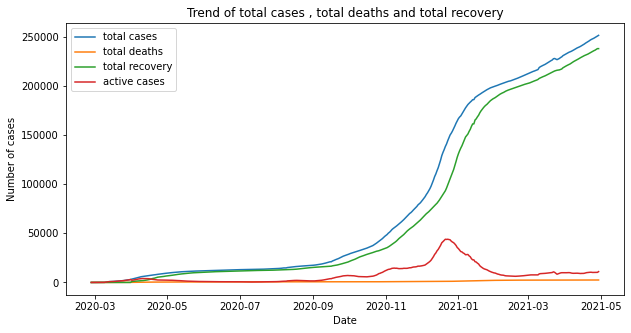

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data1['date'],data1['total_cases'])
plt.plot(data1['date'],data1['total_deaths'])
plt.plot(data1['date'],data1['total_recovery'])
plt.plot(data1['date'],data1['active_cases'])
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.legend(['total cases','total deaths','total recovery','active cases'])
plt.title("Trend of total cases , total deaths and total recovery")
plt.show()

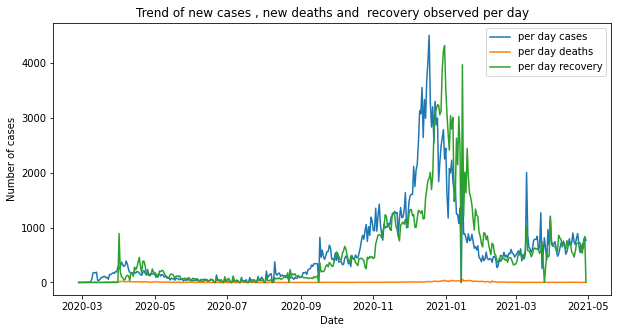

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data1['date'],data1['new_cases'])
plt.plot(data1['date'],data1['new_deaths'])
plt.plot(data1['date'],data1['daily_recovery'])
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.legend(['per day cases','per day deaths','per day recovery'])
plt.title("Trend of new cases , new deaths and  recovery observed per day")
plt.show()

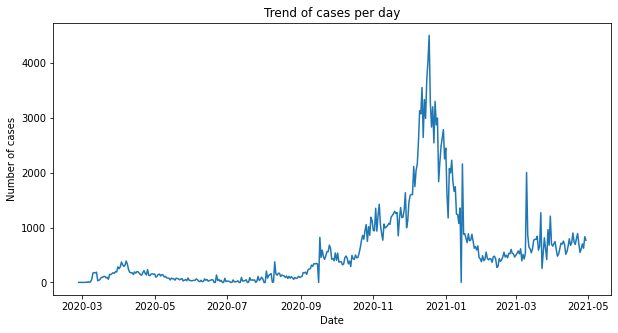

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data1['date'],data1['new_cases'])
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.title("Trend of cases per day")
plt.show()

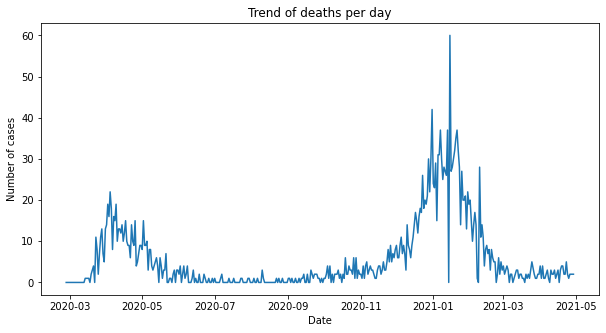

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data1['date'],data1['new_deaths'])
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.title("Trend of deaths per day")
plt.show()

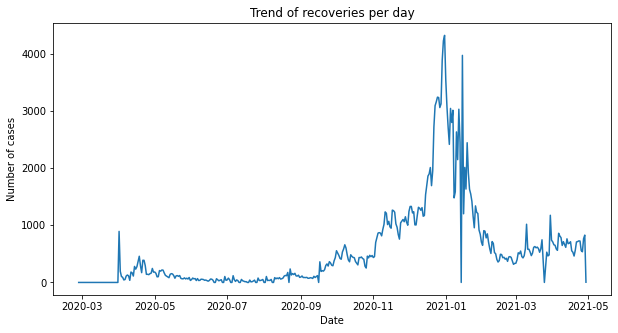

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data1['date'],data1['daily_recovery'])
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.title("Trend of recoveries per day")
plt.show()

In [ ]:
#for more clear visualization we are using plotly library
import plotly
plotly.io.renderers.default='colab'

In [ ]:
import plotly.graph_objs as go
fig=go.Figure()
fig.add_trace(go.Scatter(x=data1['date'],y=data1['total_cases'],mode='lines+markers',name='Total Cases'))
fig.update_yaxes(title_text="Total Covid cases")
fig.update_xaxes(title_text="Dates")
fig.update_layout(title_text="Trend of total cases in Denmark")

The danish government imposed the first lockdown from 13th March ,2020 when the total confimred cases crossed the 800 mark and we can see that the total confirmed cases followed somewhat a sigmoid type, meaning cases slowing increasing and then suddenly cases spike up and comimg to stable form now


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=data1['date'],y=data1['active_cases'],mode='lines+markers',name='Active Cases'))
fig.update_xaxes(title_text="Dates")
fig.update_yaxes(title_text="Total active cases")
fig.update_layout(title_text="Trend of active cases in Denmark")

Since the danish government imposed the lockdown on 13th march 2020, we see a surge in number of cases in month of mid-march and april , since this virus takes atleast 10 days to show symptoms , and before lockdown people moved freely therby spreading virus .Lockdown somewhat helps in preventing the spread of virus , and therefore less cases were reported in month of may ,june and july but when the lockdown restriction were eased and with virus mutationg , it started spreading again and now in large numbers , During the month of December cases were increasing rapidly , following which another lockdown was imposed in december which lasted till feb 

In [ ]:
import plotly.graph_objs as go
fig=go.Figure()
fig.add_trace(go.Scatter(x=data1['date'],y=data1['total_deaths'],mode='lines+markers',name='Total deaths'))
fig.update_xaxes(title_text="Dates")
fig.update_yaxes(title_text="Total deaths due to covid")
fig.update_layout(title_text="Trend of total deaths in Denmark")

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
fig=go.Figure()
fig.add_trace(go.Scatter(x=data1['date'],y=data1['total_recovery'],mode='lines+markers',name='Total recovery'))
fig.update_xaxes(title_text="Dates")
fig.update_yaxes(title_text="Total recovery")
fig.update_layout(title_text="Trend of total recovery in Denmark")

In [ ]:

fig=go.Figure()
fig.add_trace(go.Scatter(x=data1['date'],y=data1['new_cases'],mode='lines+markers',name='New Cases'))
fig.update_xaxes(title_text="Dates")
fig.update_yaxes(title_text="Daily cases")
fig.update_layout(title_text="Trend of daily cases coming in Denmark")

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=data1['date'],y=data1['new_deaths'],mode='lines+markers',name='daily Cases'))
fig.update_xaxes(title_text="Dates")
fig.update_yaxes(title_text="Daily deaths")
fig.update_layout(title_text="Trend of daily deaths in Denmark")

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=data1['date'],y=data1['daily_recovery'],mode='lines+markers',name='daily recovery'))
fig.update_xaxes(title_text="Dates")
fig.update_yaxes(title_text="Daily recovery")
fig.update_layout(title_text="Trend of daily recovery in denmark")

In [ ]:
import plotly.express as px
fig=px.bar(data1,x='date',y='new_cases',barmode='group',height=500)
fig.update_layout(title_text=" Daily cases trend of Coronavirus in denmark",plot_bgcolor='rgb(230,205,230)')
fig.show()

In [ ]:
import plotly.express as px
fig=px.bar(data1,x='date',y='daily_recovery',barmode='group',height=500)
fig.update_layout(title_text=" Daily recovery trend of Coronavirus in denmark",plot_bgcolor='rgb(230,205,230)')
fig.show()

In [ ]:
import plotly.express as px
fig=px.bar(data1,x='date',y='new_deaths',barmode='group',height=500)
fig.update_layout(title_text=" Daily deaths trend of Coronavirus in denmark",plot_bgcolor='rgb(230,205,230)')
fig.show()

In [ ]:
fig.add_trace(go.Scatter(x=data1['date'],y=data1['total_cases'],mode='lines+markers',name='Total Cases',line=dict(
                color='MediumPurple',
                width=2
            )))
fig.add_trace(go.Scatter(x=data1['date'],y=data1['total_deaths'],mode='lines+markers',name='Total Deaths',line=dict(width=2,
                                        color='DarkSlateGrey')))
fig.add_trace(go.Scatter(x=data1['date'],y=data1['total_recovery'],mode='lines+markers',name='Total Recovery',line=dict(color='LightSkyBlue',width=2)))
fig.update_xaxes(title_text="Dates")
fig.update_yaxes(title_text="Cases")
fig.update_layout(title_text="Trend of total cases/deats/recovery in denmark")

Total cases and total recoveries almost reaching the same level ,which is a good sign and the total deaths also decreasing .

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=data1['date'],y=data1['new_cases'],mode='lines+markers',name='New Cases',line=dict(color='red')))
fig.add_trace(go.Scatter(x=data1['date'],y=data1['new_deaths'],mode='lines+markers',name='New Deaths',line=dict(color='purple')))
fig.add_trace(go.Scatter(x=data1['date'],y=data1['daily_recovery'],mode='lines+markers',name='New Recovery',line=dict(color='blue')))
fig.update_xaxes(title_text="Dates")
fig.update_yaxes(title_text="Cases")
fig.update_layout(title_text="Trend of daily cases/deats/recovery in denmark")

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=data1['date'],y=data1['new_cases'].rolling(window=7).mean(),mode='lines+markers',name='New Cases',line=dict(color='red')))
fig.add_trace(go.Scatter(x=data1['date'],y=data1['new_deaths'].rolling(window=7).mean(),mode='lines+markers',name='New Deaths',line=dict(color='purple')))
fig.add_trace(go.Scatter(x=data1['date'],y=data1['daily_recovery'].rolling(window=7).mean(),mode='lines+markers',name='New Recovery',line=dict(color='blue')))
fig.update_xaxes(title_text="Dates")
fig.update_yaxes(title_text="Cases")
fig.update_layout(title_text="7 Days rolling mean of Daily increase in Daily cases/ Deaths / Recoveries")

In [ ]:
#analysing data for per week and per month for further clearance
#extarcting day,week,month and year from datetime
data1['Day']=data1['date'].dt.day
data1['week']=data1['date'].dt.week
data1['month']=data1['date'].dt.month
data1['year']=data1['date'].dt.year

In [ ]:
data1.head(2)

,date,total_cases,new_cases,total_deaths,new_deaths,total_recovery,daily_recovery,active_cases,Day,week,month,year
0,2020-02-27,1.0,1.0,0.0,0.0,0,0,1.0,27,9,2,2020
1,2020-02-28,1.0,0.0,0.0,0.0,0,0,1.0,28,9,2,2020


In [ ]:
#for year 2020
per_month_new_cases=[]
per_month_new_deaths=[]
per_month_new_recovery=[]
for i in range(2,13):
  x=data1[data1['month']==i][data1['year']==2020]
  per_month_new_cases.append(x.new_cases.sum())
  per_month_new_deaths.append(x.new_deaths.sum()) 
  per_month_new_recovery.append(x.daily_recovery.sum())
per_month_new_cases 

[3.0,
 3036.0,
 6317.0,
 2435.0,
 1099.0,
 1060.0,
 3382.0,
 11069.0,
 18384.0,
 34139.0,
 83114.0]

In [ ]:
#for year 2021 taking till present month i.e. april
for i in range(1,5):
  x=data1[data1['month']==i][data1['year']==2021]
  per_month_new_cases.append(x.new_cases.sum())
  per_month_new_deaths.append(x.new_deaths.sum())
  per_month_new_recovery.append(x.daily_recovery.sum()) 
per_month_new_cases   

[3.0,
 3036.0,
 6317.0,
 2435.0,
 1099.0,
 1060.0,
 3382.0,
 11069.0,
 18384.0,
 34139.0,
 83114.0,
 35040.0,
 12727.0,
 20624.0,
 19953.0]

In [ ]:
df1=pd.DataFrame(per_month_new_cases,columns=['per_month_new_cases'])
df2=pd.DataFrame(per_month_new_deaths,columns=['per_month_new_deaths'])
df3=pd.DataFrame(per_month_new_recovery,columns=['per_month_new_recovery'])
df3.shape

(15, 1)

In [ ]:
# now calculate per_month total cases and total deaths  
per_month_total_cases=[]
per_month_total_deaths=[]
per_month_total_recovery=[]
t=0
d=0
r=0
for i in range(len(per_month_new_cases)):
  t=t+per_month_new_cases[i]
  per_month_total_cases.append(t)
for j in range(len(per_month_new_deaths)):
  d=d+per_month_new_deaths[j]
  per_month_total_deaths.append(d)
for k in range(len(per_month_new_recovery)):
  r=r+per_month_new_recovery[k]
  per_month_total_recovery.append(r)

In [ ]:
df4=pd.DataFrame(per_month_total_cases,columns=['per_month_total_cases'])
df5=pd.DataFrame(per_month_total_deaths,columns=['per_month_total_deaths'])
df6=pd.DataFrame(per_month_total_recovery,columns=['per_month_total_recoveries'])
monthly_dataframe=pd.concat([df1,df4,df2,df5,df3,df6],axis=1)
monthly_dataframe.head(1)

,per_month_new_cases,per_month_total_cases,per_month_new_deaths,per_month_total_deaths,per_month_new_recovery,per_month_total_recoveries
0,3.0,3.0,0.0,0.0,0,0


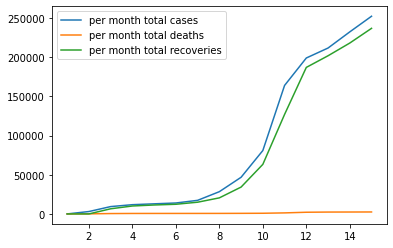

In [ ]:
x_=range(1,16)
x_range=np.array(x_)
plt.plot(x_range,monthly_dataframe['per_month_total_cases'],label='per month total cases')
plt.plot(x_range,monthly_dataframe['per_month_total_deaths'],label='per month total deaths')
plt.plot(x_range,monthly_dataframe['per_month_total_recoveries'],label='per month total recoveries')
plt.legend()
plt.show()
fig=go.Figure()
fig.add_trace(go.Scatter(x=x_range,y=monthly_dataframe['per_month_total_cases'],mode='lines+markers',name='per month total cases',line=dict(
                color='MediumPurple',
                width=1.5
            )))
fig.add_trace(go.Scatter(x=x_range,y=monthly_dataframe['per_month_total_deaths'],mode='lines+markers',name='per month total deaths',line=dict(width=2,
                                        color='DarkSlateGrey')))
fig.add_trace(go.Scatter(x=x_range,y=monthly_dataframe['per_month_total_recoveries'],mode='lines+markers',name='per month total recoveries',line=dict(color='LightSkyBlue',width=2)))
fig.update_xaxes(title_text="Month represented in Number starting from March")
fig.update_yaxes(title_text="Cases")
fig.update_layout(title_text="Trend of per month cases/deats/recovery in denmark")

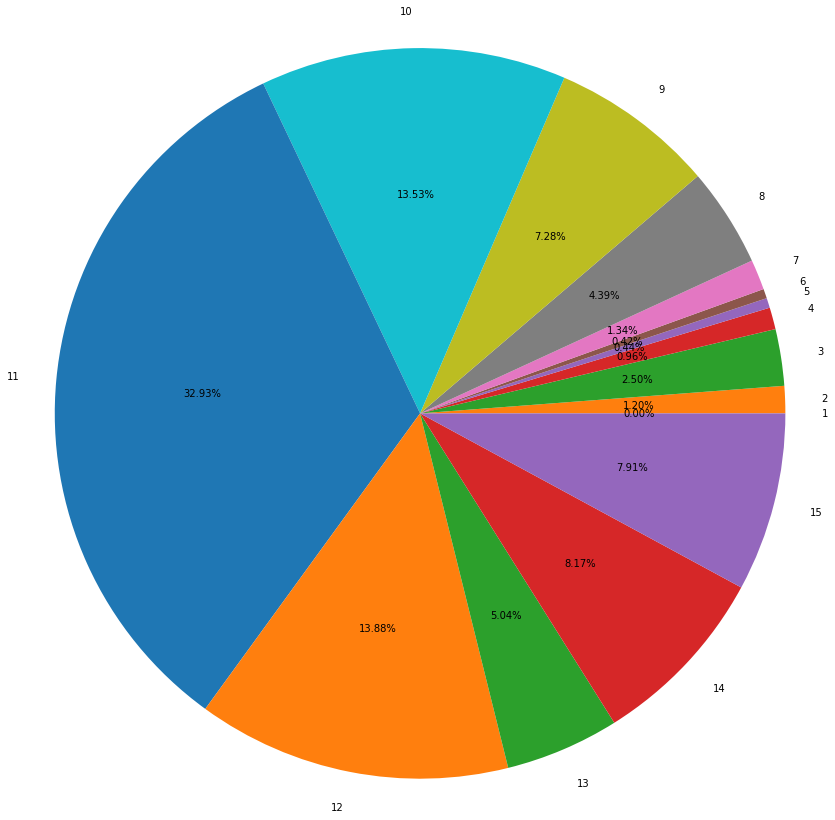

In [ ]:
plt.axis("equal")
y=range(1,16)
plt.pie(monthly_dataframe['per_month_new_cases'],labels=y,autopct="%0.2f%%",radius=4.2)
plt.show()

The graph above shows the per month analysis of cases, indicating that almost 33% of total cases were reported in month of january 

In [ ]:
fig=go.Figure()
fig = make_subplots(rows=3, 
                    cols=2, 
                    subplot_titles=('New Cases', 'Total Cases', 'New Deaths', 'Total Deaths', 'New Recoveries','Total Recoveries'))

graphs = [
          go.Scatter(x=data1['date'],y=data1['new_cases'], mode='lines+markers',name='Daily cases'),
          go.Scatter(x=data1['date'],y=data1['total_cases'], mode='lines+markers',name='total cases'),
          go.Scatter(x=data1['date'],y=data1['new_deaths'],mode='lines+markers',name='Daily deaths'),
          go.Scatter(x=data1['date'],y=data1['total_deaths'],mode='lines+markers',name='total deaths'),
          go.Scatter(x=data1['date'],y=data1['daily_recovery'], mode='lines+markers',name='daily recovery'),
          go.Scatter(x=data1['date'],y=data1['total_recovery'], mode='lines+markers',name='total recovery')]
for i in range(0,int(len(graphs)/2)):
  for j in range(0,2):
    fig.add_trace(
      graphs[2*i+j],
      row=i+1, 
      col=1+j
    )
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Cases")
fig.update_layout(title_text="Denmark Data", height=750)

In [ ]:
new_data_copy=new_data.copy()

In [ ]:
new_data_copy.nunique()

level_0                       428
index                         428
iso_code                        1
continent                       1
location                        1
                             ... 
male_smokers                    1
handwashing_facilities          0
hospital_beds_per_thousand      1
life_expectancy                 1
human_development_index         1
Length: 61, dtype: int64

In [ ]:
new_data_copy.head(3)

,level_0,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,25,20745,DNK,Europe,Denmark,2020-02-27,1.0,1.0,NaN,NaN,NaN,NaN,0.173,0.173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0,158.0,0.027,0.019,21.0,0.004,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94
1,26,20746,DNK,Europe,Denmark,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.173,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,220.0,0.038,0.011,30.0,0.005,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94
2,27,20747,DNK,Europe,Denmark,2020-02-29,3.0,2.0,NaN,NaN,NaN,NaN,0.518,0.345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,294.0,0.051,0.013,41.0,0.007,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94


In [ ]:
new_data_copy.dropna(subset=['total_tests','new_tests'])       #removing rows with null values

,level_0,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,25,20745,DNK,Europe,Denmark,2020-02-27,1.0,1.0,NaN,NaN,NaN,NaN,0.173,0.173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0,158.0,0.027,0.019,21.0,0.004,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94
1,26,20746,DNK,Europe,Denmark,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.173,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,220.0,0.038,0.011,30.0,0.005,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94
2,27,20747,DNK,Europe,Denmark,2020-02-29,3.0,2.0,NaN,NaN,NaN,NaN,0.518,0.345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,294.0,0.051,0.013,41.0,0.007,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94
3,28,20748,DNK,Europe,Denmark,2020-03-01,4.0,1.0,NaN,NaN,NaN,NaN,0.691,0.173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.995,0.172,49.0,343.0,0.059,0.008,47.0,0.008,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94
4,29,20749,DNK,Europe,Denmark,2020-03-02,4.0,0.0,NaN,NaN,NaN,NaN,0.691,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,423.0,0.073,0.014,58.0,0.010,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,433,21153,DNK,Europe,Denmark,2021-04-10,237793.0,755.0,626.143,2440.0,3.0,1.571,41053.982,130.348,108.101,421.256,0.518,0.271,1.00,38.0,6.561,208.0,35.910,NaN,NaN,NaN,NaN,151557.0,23601478.0,4074.698,26.166,178233.0,30.771,0.004,284.7,tests performed,1314527.0,867925.0,446602.0,22216.0,20575.0,22.69,14.98,7.71,3552.0,64.81,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94
409,434,21154,DNK,Europe,Denmark,2021-04-11,238484.0,691.0,639.143,2442.0,2.0,1.714,41173.281,119.298,110.345,421.601,0.345,0.296,1.00,38.0,6.561,211.0,36.428,NaN,NaN,204.919,35.378,154062.0,23755540.0,4101.296,26.598,176479.0,30.468,0.004,276.1,tests performed,1333322.0,882806.0,450516.0,18795.0,21332.0,23.02,15.24,7.78,3683.0,64.81,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94
410,435,21155,DNK,Europe,Denmark,2021-04-12,238998.0,514.0,644.143,2444.0,2.0,1.857,41262.021,88.740,111.209,421.947,0.345

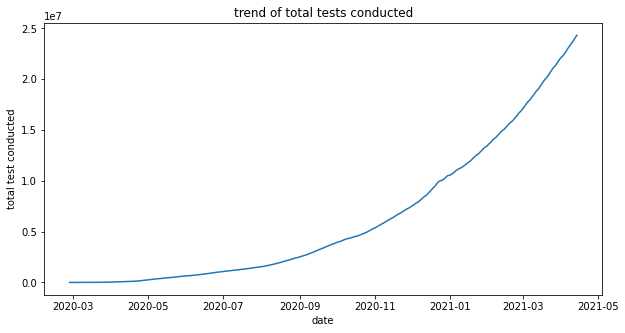

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(new_data_copy['date'],new_data_copy['total_tests'])
plt.xlabel('date')
plt.ylabel("total test conducted")
plt.title("trend of total tests conducted")
plt.show()

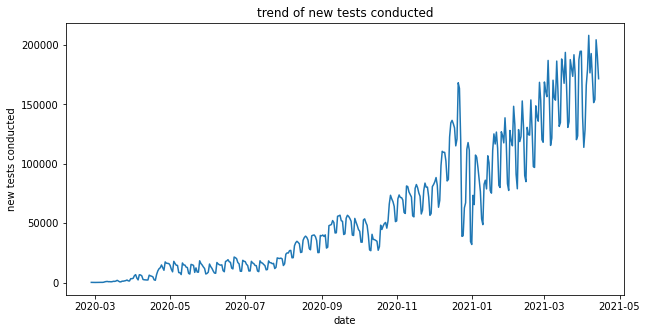

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(new_data_copy['date'],new_data_copy['new_tests'])
plt.xlabel('date')
plt.ylabel("new tests conducted")
plt.title("trend of new tests conducted")
plt.show()

In [ ]:
data1.head(2)

,date,total_cases,new_cases,total_deaths,new_deaths,total_recovery,daily_recovery,active_cases,Day,week,month,year
0,2020-02-27,1.0,1.0,0.0,0.0,0,0,1.0,27,9,2,2020
1,2020-02-28,1.0,0.0,0.0,0.0,0,0,1.0,28,9,2,2020


In [ ]:
data1['recovery_rate']=data1['total_recovery']/(data1['total_recovery']+data1['total_deaths'])
data1['death_rate']=data1['total_deaths']/(data1['total_recovery']+data1['total_deaths'])
data1.head(10)

,date,total_cases,new_cases,total_deaths,new_deaths,total_recovery,daily_recovery,active_cases,Day,week,month,year,recovery_rate,death_rate
0,2020-02-27,1.0,1.0,0.0,0.0,0,0,1.0,27,9,2,2020,NaN,NaN
1,2020-02-28,1.0,0.0,0.0,0.0,0,0,1.0,28,9,2,2020,NaN,NaN
2,2020-02-29,3.0,2.0,0.0,0.0,0,0,3.0,29,9,2,2020,NaN,NaN
3,2020-03-01,4.0,1.0,0.0,0.0,0,0,4.0,1,9,3,2020,NaN,NaN
4,2020-03-02,4.0,0.0,0.0,0.0,0,0,4.0,2,10,3,2020,NaN,NaN
5,2020-03-03,6.0,2.0,0.0,0.0,0,0,6.0,3,10,3,2020,NaN,NaN
6,2020-03-04,11.0,5.0,0.0,0.0,0,0,11.0,4,10,3,2020,NaN,NaN
7,2020-03-05,11.0,0.0,0.0,0.0,0,0,11.0,5,10,3,2020,NaN,NaN
8,2020-03-06,24.0,13.0,0.0,0.0,1,1,23.0,6,10,3,2020,1.0,0.0
9,2020-03-07,24.0,0.0,0.0,0.0,1,0,23.0,7,10,3,2020,1.0,0.0


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=data1['date'],y=data1['recovery_rate'],mode='lines+markers',name='Recovery Rate',line=dict(color='green')))
fig.add_trace(go.Scatter(x=data1['date'],y=data1['death_rate'],mode='lines+markers',name='Death Rate',line=dict(color='yellow')))
fig.update_xaxes(title_text="Dates")
fig.update_yaxes(title_text="Percent(%)")
fig.update_layout(title_text="Outcome of total closed cases (recovery rate vs death rate)")

In [ ]:
new_data_copy2=new_data.copy()
new_data_copy2.head(5)

,level_0,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,25,20745,DNK,Europe,Denmark,2020-02-27,1.0,1.0,NaN,NaN,NaN,NaN,0.173,0.173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0,158.0,0.027,0.019,21.0,0.004,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94
1,26,20746,DNK,Europe,Denmark,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.173,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,220.0,0.038,0.011,30.0,0.005,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94
2,27,20747,DNK,Europe,Denmark,2020-02-29,3.0,2.0,NaN,NaN,NaN,NaN,0.518,0.345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,294.0,0.051,0.013,41.0,0.007,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94
3,28,20748,DNK,Europe,Denmark,2020-03-01,4.0,1.0,NaN,NaN,NaN,NaN,0.691,0.173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.995,0.172,49.0,343.0,0.059,0.008,47.0,0.008,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94
4,29,20749,DNK,Europe,Denmark,2020-03-02,4.0,0.0,NaN,NaN,NaN,NaN,0.691,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,423.0,0.073,0.014,58.0,0.010,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94


In [ ]:
new_data_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   level_0                                428 non-null    int64         
 1   index                                  428 non-null    int64         
 2   iso_code                               428 non-null    object        
 3   continent                              428 non-null    object        
 4   location                               428 non-null    object        
 5   date                                   428 non-null    datetime64[ns]
 6   total_cases                            428 non-null    float64       
 7   new_cases                              428 non-null    float64       
 8   new_cases_smoothed                     423 non-null    float64       
 9   total_deaths                           412 non-null    float64   

In [ ]:
new_data_copy2.dropna(subset=['hosp_patients','icu_patients'])

,level_0,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
77,102,20822,DNK,Europe,Denmark,2020-05-14,10911.0,46.0,90.000,537.0,4.0,3.286,1883.739,7.942,15.538,92.711,0.691,0.567,0.69,35.0,6.043,147.0,25.379,NaN,NaN,NaN,NaN,12977.0,430585.0,74.339,2.240,11748.0,2.028,0.008,130.5,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.74,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94
78,103,20823,DNK,Europe,Denmark,2020-05-15,10989.0,78.0,81.857,537.0,0.0,2.143,1897.206,13.466,14.132,92.711,0.000,0.370,0.69,32.0,5.525,137.0,23.652,NaN,NaN,NaN,NaN,12650.0,443235.0,76.523,2.184,12358.0,2.134,0.007,151.0,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.74,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94
79,104,20824,DNK,Europe,Denmark,2020-05-16,11056.0,67.0,77.000,543.0,6.0,2.429,1908.773,11.567,13.294,93.747,1.036,0.419,0.70,28.0,4.834,140.0,24.170,NaN,NaN,NaN,NaN,7715.0,450950.0,77.855,1.332,12282.0,2.120,0.006,159.5,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.74,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94
80,105,20825,DNK,Europe,Denmark,2020-05-17,11125.0,69.0,71.143,547.0,4.0,2.571,1920.685,11.913,12.283,94.437,0.691,0.444,0.71,27.0,4.661,133.0,22.962,NaN,NaN,63.664,10.991,7094.0,458044.0,79.079,1.225,12339.0,2.130,0.006,173.4,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.74,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94
81,106,20826,DNK,Europe,Denmark,2020-05-18,11166.0,41.0,65.000,548.0,1.0,2.143,1927.764,7.078,11.222,94.610,0.173,0.370,0.71,26.0,4.489,144.0,24.861,NaN,NaN,NaN,NaN,15262.0,473306.0,81.714,2.635,12170.0,2.101,0.005,187.2,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.74,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,444,21164,DNK,Europe,Denmark,2021-04-21,245562.0,803.0,762.429,2466.0,2.0,2.571,42395.268,138.635,131.630,425.745,0.345,0.444,1.03,41.0,7.078,191.0,32.975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1691135.0,1141815.0,549320.0,35297.0,29260.0,29.20,19.71,9.48,5052.0,56.48,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94
420,445,21165,DNK,Europe,Denmark,2021-04-22,246455.0,893.0,776.000,2468.0,2.0,2.571,42549.441,154.173,133.973,426.090,0.345,0.444,1.02,44.0,7.596,191.0,32.975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1724694.0,1169983.0,554711.0,33559.0,30565.0,29.78,20.20,9.58,5277.0,56.48,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=new_data_copy2['date'],y=new_data_copy2['hosp_patients'],mode='lines+markers',name='Number of hospital patients',line=dict(color='green')))
fig.add_trace(go.Scatter(x=new_data_copy2['date'],y=new_data_copy2['icu_patients'],mode='lines+markers',name='Number of icu patients',line=dict(color='red')))
fig.update_xaxes(title_text="Dates")
fig.update_yaxes(title_text="Number of patients")
fig.update_layout(title_text="Hospital patients vs icu patients")

# VACCINATION DATA


In [ ]:
vaccination_data=pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/Denmark.csv')
vaccination_data['date']=pd.to_datetime(vaccination_data['date'], errors='coerce')
vaccination_data['days']=vaccination_data.index-vaccination_data.index[0]
vaccination_data

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,days
0,Denmark,2020-12-27,Pfizer/BioNTech,https://covid19.ssi.dk/overvagningsdata/vaccin...,6366,6366,NaN,0
1,Denmark,2020-12-28,Pfizer/BioNTech,https://covid19.ssi.dk/overvagningsdata/vaccin...,8384,8384,NaN,1
2,Denmark,2020-12-29,Pfizer/BioNTech,https://covid19.ssi.dk/overvagningsdata/vaccin...,17190,17190,NaN,2
3,Denmark,2020-12-30,Pfizer/BioNTech,https://covid19.ssi.dk/overvagningsdata/vaccin...,28451,28451,NaN,3
4,Denmark,2020-12-31,Pfizer/BioNTech,https://covid19.ssi.dk/overvagningsdata/vaccin...,34504,34504,NaN,4
...,...,...,...,...,...,...,...,...
119,Denmark,2021-04-25,"Moderna, Pfizer/BioNTech",https://covid19.ssi.dk/overvagningsdata/vaccin...,1801121,1222243,578878.0,119
120,Denmark,2021-04-26,"Moderna, Pfizer/BioNTech",https://covid19.ssi.dk/overvagningsdata/vaccin...,1840461,1253730,586731.0,120
121,Denmark,2021-04-27,"Moderna, Pfizer/BioNTech",https://covid19.ssi.dk/overvagningsdata/vaccin...,1887962,1280282,607680.0,121
122,Denmark,2021-04-28,"Moderna, Pfizer/BioNTech",https://covid19.ssi.dk/overvagningsdata/vaccin...,1932543,1304345,628198.0,122


In [ ]:
vaccination_data.fillna(value=0,inplace=True)

In [ ]:
vaccination_data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,days
count,1.240000e+02,1.240000e+02,124.000000,124.000000
mean,7.074151e+05,4.824506e+05,224964.524194,61.500000
std,5.454091e+05,3.609711e+05,186944.866207,35.939764
min,6.366000e+03,6.366000e+03,0.000000,0.000000
25%,2.160275e+05,1.802555e+05,35772.000000,30.750000
50%,5.957550e+05,4.135800e+05,182175.000000,61.500000
75%,1.089154e+06,7.137372e+05,375416.250000,92.250000
max,1.976312e+06,1.330183e+06,646129.000000,123.000000


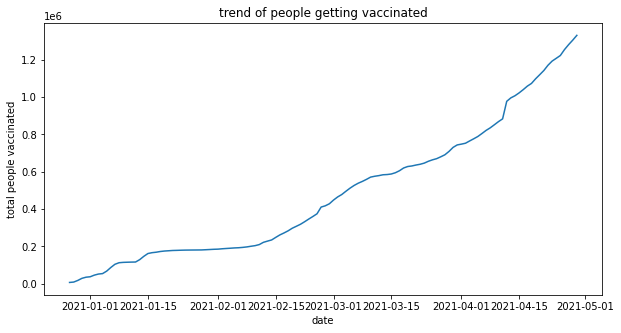

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(vaccination_data['date'],vaccination_data['people_vaccinated'])
plt.xlabel('date')
plt.ylabel("total people vaccinated")
plt.title("trend of people getting vaccinated")
plt.show()

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=vaccination_data['date'],y=vaccination_data['total_vaccinations'], mode='lines+markers',name='Total vaccinations'))
fig.add_trace(go.Scatter(x=vaccination_data['date'],y=vaccination_data['people_vaccinated'], mode='lines+markers',name='Total People Vaccinated'))
fig.add_trace(go.Scatter(x=vaccination_data['date'],y=vaccination_data['people_fully_vaccinated'], mode='lines+markers',name='People Fully Vaccinated'))
fig.update_xaxes(title_text="Dates")
fig.update_yaxes(title_text="Vaccinated")
fig.update_layout(title_text="Vaccination plots")

In [ ]:
d1=pd.read_csv("../data/denmark_adult.CSV")
d1

,[Vaccination.YearWeek],Uptake first dose,Uptake full vaccination
0,2020-W52,0.0%,0.0%
1,2020-W53,1.0%,0.0%
2,2021-W01,2.4%,0.0%
3,2021-W02,3.6%,0.0%
4,2021-W03,3.8%,0.6%
5,2021-W04,3.9%,1.9%
6,2021-W05,4.1%,3.1%
7,2021-W06,5.0%,3.6%
8,2021-W07,6.8%,3.8%
9,2021-W08,9.2%,4.0%


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=d1['[Vaccination.YearWeek]'],y=d1['Uptake first dose'], mode='lines+markers',name='First Dose'))
fig.add_trace(go.Scatter(x=d1['[Vaccination.YearWeek]'],y=d1['Uptake full vaccination'], mode='lines+markers',name='Fully vaccinated'))
fig.update_xaxes(title_text="Dates")
fig.update_yaxes(title_text="Percent(%)")
fig.update_layout(title_text="Cummulative uptake (%) of at least one vaccine and full vaccination in adults above age 18 in Denamrk ")

In [ ]:
d2=pd.read_csv("../data/denmark_old.CSV")
d2.head(2)

,[Vaccination.YearWeek],Uptake first dose,Uptake full vaccination
0,2020-W52,0.0%,0.0%
1,2020-W53,4.2%,0.0%


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=d2['[Vaccination.YearWeek]'],y=d2['Uptake first dose'], mode='lines+markers',name='First Dose'))
fig.add_trace(go.Scatter(x=d2['[Vaccination.YearWeek]'],y=d2['Uptake full vaccination'], mode='lines+markers',name='Fully vaccinated'))
fig.update_xaxes(title_text="Dates")
fig.update_yaxes(title_text="Percent(%)")
fig.update_layout(title_text="Cummulative uptake (%) of at least one vaccine and full vaccination in adults above age 80 in Denamrk ")

In [ ]:
d3=pd.read_csv("../data/denmark_age_compare.CSV")
d3.head(3)

,Reporting week,Age Group,Proportion of doses
0,2020-W53,18-24 years,2%
1,2020-W53,25-49 years,31%
2,2020-W53,50-59 years,18%


In [ ]:
import plotly.express as px
fig = px.bar(d3, x='Reporting week', y='Proportion of doses',
             hover_data=['Age Group', 'Proportion of doses'], color='Age Group'
             , height=400)
fig.show()

# Data Forcasting



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
data1.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            418, 419, 420, 421, 422, 423, 424, 425, 426, 427],
           dtype='int64', length=425)

In [ ]:
data1['days']=data1.index-data1.index[0]
data1.tail()

,date,total_cases,new_cases,total_deaths,new_deaths,total_recovery,daily_recovery,active_cases,Day,week,month,year,recovery_rate,death_rate,days
423,2021-04-25,248316.0,612.0,2476.0,1.0,235622,557,10218.0,25,16,4,2021,0.989601,0.010399,423
424,2021-04-26,249020.0,704.0,2478.0,2.0,236159,537,10383.0,26,17,4,2021,0.989616,0.010384,424
425,2021-04-27,249644.0,624.0,2480.0,2.0,236925,766,10239.0,27,17,4,2021,0.989641,0.010359,425
426,2021-04-28,250479.0,835.0,2482.0,2.0,237753,828,10244.0,28,17,4,2021,0.989668,0.010332,426
427,2021-04-29,251248.0,769.0,2484.0,2.0,237757,4,11007.0,29,17,4,2021,0.989660,0.010340,427


# Linear Regression Model for confirm case prediction


In [ ]:
train_ml=data1.iloc[:int(data1.shape[0]*0.95)]             #spliting our dataset to train and testing sets
test_ml=data1.iloc[int(data1.shape[0]*0.95):]
model_scores=[]

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
lin_reg=LinearRegression(normalize=True)

In [ ]:
lin_reg.fit(np.array(train_ml["days"]).reshape(-1,1),np.array(train_ml["total_cases"]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
prediction_valid_of_linreg=lin_reg.predict(np.array(test_ml["days"]).reshape(-1,1))

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(test_ml["total_cases"],prediction_valid_of_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(test_ml["total_cases"],prediction_valid_of_linreg)))

Root Mean Square Error for Linear Regression:  38027.1371761407


In [ ]:
plt.figure(figsize=(10,5))
prediction_linreg=lin_reg.predict(np.array(data1["days"]).reshape(-1,1))
linreg_output=[]
for i in range(prediction_linreg.shape[0]):
    linreg_output.append(prediction_linreg[i][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=data1.index, y=data1["total_cases"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=data1.index, y=linreg_output,
                    mode='lines',name="Linear Regression Best Fit Line",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Linear Regression Prediction",
                 xaxis_title="Days",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 720x360 with 0 Axes>

We can see that the linear model fails here since it gives a linear trend while our total_cases trend is obviously not linear

# Support Vector Machine ModelRegressor for Prediction of Confirmed Cases

In [ ]:
train_ml=data1.iloc[:int(data1.shape[0]*0.95)]
test_ml=data1.iloc[int(data1.shape[0]*0.95):]
model_scores=[]

In [ ]:
#Intializing SVR Model
svm=SVR(shrinking=True,C=1,degree=7,kernel='poly',epsilon=0.01)

In [ ]:
#Fitting model on the training data
svm.fit(np.array(train_ml["days"]).reshape(-1,1),np.array(train_ml["total_cases"]).reshape(-1,1))

SVR(C=1, cache_size=200, coef0=0.0, degree=7, epsilon=0.01, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
prediction_valid_svm=svm.predict(np.array(test_ml["days"]).reshape(-1,1))

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(test_ml["total_cases"],prediction_valid_svm)))
print("Root Mean Square Error for Support Vectore Machine: ",np.sqrt(mean_squared_error(test_ml["total_cases"],prediction_valid_svm)))

Root Mean Square Error for Support Vectore Machine:  232416.76424938257


In [ ]:
plt.figure(figsize=(10,5))
prediction_svm=svm.predict(np.array(data1["days"]).reshape(-1,1))
fig=go.Figure()
fig.add_trace(go.Scatter(x=data1.index, y=data1["total_cases"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=data1.index, y=prediction_svm,
                    mode='lines',name="Support Vector Machine Best fit Kernel",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Support Vectore Machine Regressor Prediction",
                 xaxis_title="Days",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 720x360 with 0 Axes>

# Polynomial Regression for Prediction of Confirmed Cases

In [ ]:

train_ml=data1.iloc[:int(data1.shape[0]*0.95)]             #spliting our dataset to train and testing sets
test_ml=data1.iloc[int(data1.shape[0]*0.95):]
#TRYING FOR DIFFERENT DEGREE'S
for i in range(2,9):
  model_scores=[]
  poly = PolynomialFeatures(degree =i) 

  train_poly=poly.fit_transform(np.array(train_ml["days"]).reshape(-1,1))
  test_poly=poly.fit_transform(np.array(test_ml["days"]).reshape(-1,1))
  y=train_ml["total_cases"]

  linreg=LinearRegression(normalize=True)
  linreg.fit(train_poly,y)

  prediction_poly=linreg.predict(test_poly)
  rmse_poly=np.sqrt(mean_squared_error(test_ml["total_cases"],prediction_poly))
  model_scores.append(rmse_poly)
  print("Root Mean Squared Error for Polynomial Regression for "f"{i}"" degree: ",rmse_poly)

  computing_data=poly.fit_transform(np.array(data1["days"]).reshape(-1,1))
  plt.figure(figsize=(10,5))
  predictions_poly=linreg.predict(computing_data)

  fig=go.Figure()
  fig.add_trace(go.Scatter(x=data1.index, y=data1["total_cases"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
  fig.add_trace(go.Scatter(x=data1.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
  fig.update_layout(title="Confirmed Cases Polynomial Regression Prediction for ",
                 xaxis_title="Days",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
  fig.show()

Root Mean Squared Error for Polynomial Regression for 2 degree:  49337.9803716165


Root Mean Squared Error for Polynomial Regression for 3 degree:  49095.75202818485


Root Mean Squared Error for Polynomial Regression for 4 degree:  22128.027350648572


Root Mean Squared Error for Polynomial Regression for 5 degree:  66976.28744008121


Root Mean Squared Error for Polynomial Regression for 6 degree:  35154.785939004105


Root Mean Squared Error for Polynomial Regression for 7 degree:  41146.07333956183


Root Mean Squared Error for Polynomial Regression for 8 degree:  101808.88437639206


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [ ]:
train_ml=data1.iloc[:int(data1.shape[0]*0.95)]             #spliting our dataset to train and testing sets
test_ml=data1.iloc[int(data1.shape[0]*0.95):]
model_scores=[]

In [ ]:
poly = PolynomialFeatures(degree =3) 

In [ ]:
train_poly=poly.fit_transform(np.array(train_ml["days"]).reshape(-1,1))
test_poly=poly.fit_transform(np.array(test_ml["days"]).reshape(-1,1))
y=train_ml["total_cases"]

In [ ]:
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
prediction_poly=linreg.predict(test_poly)
rmse_poly=np.sqrt(mean_squared_error(test_ml["total_cases"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  49095.75202818485


In [ ]:
computing_data=poly.fit_transform(np.array(data1["days"]).reshape(-1,1))
plt.figure(figsize=(10,5))
predictions_poly=linreg.predict(computing_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=data1.index, y=data1["total_cases"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=data1.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Polynomial Regression Prediction",
                 xaxis_title="Days",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 720x360 with 0 Axes>

In [ ]:
new_prediction_poly=[]
for i in range(1,90):
    new_date_poly=poly.fit_transform(np.array(data1["days"].max()+i).reshape(-1,1))
    new_prediction_poly.append(linreg.predict(new_date_poly)[0])

In [ ]:
#predicting for next 3 months
#start=data1['date'].iloc[-1]
new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,90):
    new_date.append(data1['date'].iloc[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(data1["days"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(data1["days"].max()+i).reshape(-1,1))[0])

In [ ]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_poly,new_prediction_svm),
                               columns=["Dates","Linear Regression Prediction","Polynonmial Regression Prediction","SVM Prediction"])
model_predictions.head(50)

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction
0,2021-04-30,212851.0554,312882.6415,565190.2770
1,2021-05-01,213475.1461,314711.3613,574253.1143
2,2021-05-02,214099.2368,316545.3531,583443.5948
3,2021-05-03,214723.3275,318384.6164,592763.2133
4,2021-05-04,215347.4183,320229.1510,602213.4783
5,2021-05-05,215971.5090,322078.9565,611795.9124
6,2021-05-06,216595.5997,323934.0327,621512.0525
7,2021-05-07,217219.6904,325794.3792,631363.4497
8,2021-05-08,217843.7811,327659.9957,641351.6694
9,2021-05-09,218467.8719,329530.8820,651478.2916


In [ ]:
#prediction for next 3 months
#using linear regression 
plt.figure(figsize=(10,5))
prediction_linreg=lin_reg.predict(np.array(data1["days"]).reshape(-1,1))
linreg_output=[]
for i in range(prediction_linreg.shape[0]):
    linreg_output.append(prediction_linreg[i][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=data1['date'], y=data1["total_cases"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=data1['date'], y=linreg_output,
                    mode='lines',name="Linear Regression Best Fit Line",
                    line=dict(color='black', dash='dot')))
fig.add_trace(go.Scatter(x=model_predictions['Dates'], y=model_predictions['Linear Regression Prediction'],
                    mode='lines',name="Linear Regression Best Fit Line for next 3 months",
                    line=dict(color='red', dash='dot')))
fig.update_layout(title="Confirmed Cases Linear Regression Prediction",
                 xaxis_title="Days",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 720x360 with 0 Axes>

In [ ]:
#prediction for next 3 months
#using Support vector regressor
plt.figure(figsize=(10,5))
prediction_svm=svm.predict(np.array(data1["days"]).reshape(-1,1))
fig=go.Figure()
fig.add_trace(go.Scatter(x=data1['date'], y=data1["total_cases"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))

fig.add_trace(go.Scatter(x=data1['date'], y=prediction_svm,
                    mode='lines',name="Support Vector Machine Best fit Kernel",
                    line=dict(color='black', dash='dot')))

fig.add_trace(go.Scatter(x=model_predictions['Dates'], y=model_predictions['SVM Prediction'],
                    mode='lines',name="Support Vector Machine Best fit Kernel for next 3 months",
                    line=dict(color='red', dash='dot')))

fig.update_layout(title="Confirmed Cases Support Vectore Machine Regressor Prediction",
                 xaxis_title="Days",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 720x360 with 0 Axes>

In [ ]:
#prediction for next 3 months
#using ploynomial regression
computing_data=poly.fit_transform(np.array(data1["days"]).reshape(-1,1))
plt.figure(figsize=(10,5))
predictions_poly=linreg.predict(computing_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=data1['date'], y=data1["total_cases"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=data1['date'], y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.add_trace(go.Scatter(x=model_predictions['Dates'], y=model_predictions['Polynonmial Regression Prediction'],
                    mode='lines',name="Polynomial Regression Best Fit for next 3 months",
                    line=dict(color='red', dash='dot')))
fig.update_layout(title="Confirmed Cases Polynomial Regression Prediction",
                 xaxis_title="Days",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 720x360 with 0 Axes>

# Trying Random Forest Regression


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
train_ml=data1.iloc[:int(data1.shape[0]*0.95)]
test_ml=data1.iloc[int(data1.shape[0]*0.95):]
model_scores=[]

In [ ]:
forest = RandomForestRegressor(n_estimators=50,max_depth=2)

In [ ]:
#Fitting model on the training data
forest.fit(np.array(train_ml["days"]).reshape(-1,1),np.array(train_ml["total_cases"]).reshape(-1,1))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
prediction_valid_random_forest=forest.predict(np.array(test_ml["days"]).reshape(-1,1))

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(test_ml["total_cases"],prediction_valid_random_forest)))
print("Root Mean Square Error for Support Vectore Machine: ",np.sqrt(mean_squared_error(test_ml["total_cases"],prediction_valid_random_forest)))

Root Mean Square Error for Support Vectore Machine:  34357.41531695163


In [ ]:
new_prediction_random_forest=[]
for i in range(1,90):
    new_prediction_random_forest.append(forest.predict(np.array(data1["days"].max()+i).reshape(-1,1))[0])

In [ ]:
model_predictions['Random Forest Regression']=new_prediction_random_forest

In [ ]:
plt.figure(figsize=(10,5))
prediction_forest=forest.predict(np.array(data1["days"]).reshape(-1,1))
fig=go.Figure()
fig.add_trace(go.Scatter(x=data1['date'], y=data1["total_cases"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=data1['date'], y=prediction_forest,
                    mode='lines',name="Random forest reression prediction",
                    line=dict(color='black', dash='dot')))
fig.add_trace(go.Scatter(x=model_predictions['Dates'], y=model_predictions['Random Forest Regression'],
                    mode='lines',name="Prediction for next 30 days",
                    line=dict(color='red', dash='dot')))

fig.update_layout(title="Confirmed Cases Random Forest Regressor Prediction",
                 xaxis_title="Days",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 720x360 with 0 Axes>

# Time Series Forcasting


# Holt Linear Model


In [ ]:
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from fbprophet import Prophet

In [ ]:
train_ml=data1.iloc[:int(data1.shape[0]*0.95)]
test_ml=data1.iloc[int(data1.shape[0]*0.95):]
y_pred=test_ml.copy()
model_scores=[]

In [ ]:
holt=Holt(np.asarray(train_ml["total_cases"])).fit(smoothing_level=0.4, smoothing_slope=0.4,optimized=False) 

In [ ]:
y_pred["Holt"]=holt.forecast(len(test_ml))
model_scores.append(np.sqrt(mean_squared_error(y_pred["total_cases"],y_pred["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(y_pred["total_cases"],y_pred["Holt"])))

Root Mean Square Error Holt's Linear Model:  1365.0805667498344


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=train_ml.index, y=train_ml["total_cases"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))

fig.add_trace(go.Scatter(x=test_ml.index, y=test_ml["total_cases"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))

fig.add_trace(go.Scatter(x=test_ml.index, y=y_pred["Holt"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))

fig.update_layout(title="Confirmed Cases Holt's Linear Model Prediction",
                 xaxis_title="Days",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
#making prediction for next 3 months
holt_new_prediction=[]
for i in range(1,90):
    holt_new_prediction.append(holt.forecast((len(test_ml)+i))[-1])
model_predictions["Holt Linear Model Prediction"]=holt_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Random Forest Regression,Holt Linear Model Prediction
0,2021-04-30,212851.0554,312882.6415,565190.2770,209640.1039,249384.6109
1,2021-05-01,213475.1461,314711.3613,574253.1143,209640.1039,249975.3078
2,2021-05-02,214099.2368,316545.3531,583443.5948,209640.1039,250566.0047
3,2021-05-03,214723.3275,318384.6164,592763.2133,209640.1039,251156.7015
4,2021-05-04,215347.4183,320229.1510,602213.4783,209640.1039,251747.3984


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=data1['date'], y=data1["total_cases"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))

fig.add_trace(go.Scatter(x=model_predictions['Dates'], y=model_predictions['Holt Linear Model Prediction'],
                    mode='lines',name="Prediction for next 30 days",
                    line=dict(color='blue', dash='dot')))

fig.update_layout(title="Confirmed Cases Holt's Linear Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

# Facebook's Prophet Model for forecasting

In [ ]:
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_confirmed=pd.DataFrame(zip(list(data1['date']),list(data1["total_cases"])),columns=['ds','y'])

In [ ]:
prophet_confirmed

,ds,y
0,2020-02-27,1.0000
1,2020-02-28,1.0000
2,2020-02-29,3.0000
3,2020-03-01,4.0000
4,2020-03-02,4.0000
...,...,...
420,2021-04-25,248316.0000
421,2021-04-26,249020.0000
422,2021-04-27,249644.0000
423,2021-04-28,250479.0000


In [ ]:
prophet_c.fit(prophet_confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast_c=prophet_c.make_future_dataframe(periods=89)
forecast_confirmed=forecast_c.copy()

In [ ]:
confirmed_forecast=prophet_c.predict(forecast_c)

In [ ]:
model_scores=[]
model_scores.append(np.sqrt(mean_squared_error(data2["total_cases"],confirmed_forecast['yhat'].head(data2.shape[0]))))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(data2["total_cases"],confirmed_forecast['yhat'].head(data2.shape[0]))))

Root Mean Squared Error for Prophet Model:  1254.2158982810854


Figure(720x432)


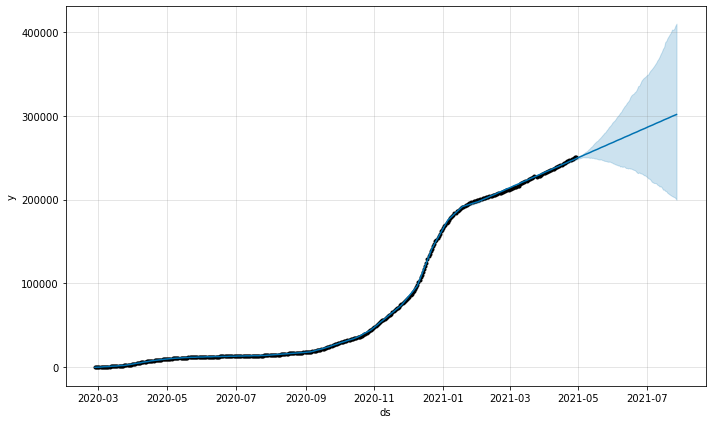

In [ ]:
print(prophet_c.plot(confirmed_forecast))

Figure(648x432)


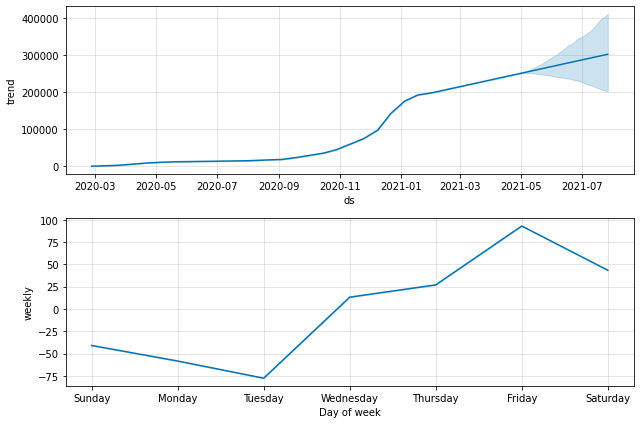

In [ ]:
print(prophet_c.plot_components(confirmed_forecast))

In [ ]:
model_predictions["Prophet's Prediction"]=list(confirmed_forecast["yhat"].tail(89))
model_predictions["Prophet's Upper Bound"]=list(confirmed_forecast["yhat_upper"].tail(89))
model_predictions["Prophet's Lower Bound"]=list(confirmed_forecast["yhat_lower"].tail(89))
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Random Forest Regression,Holt Linear Model Prediction,Prophet's Prediction,Prophet's Upper Bound,Prophet's Lower Bound
0,2021-04-30,212851.0554,312882.6415,565190.2770,209640.1039,249384.6109,249743.8863,251083.2962,248379.3306
1,2021-05-01,213475.1461,314711.3613,574253.1143,209640.1039,249975.3078,250286.4316,251718.9841,248909.4656
2,2021-05-02,214099.2368,316545.3531,583443.5948,209640.1039,250566.0047,250794.2384,252295.1356,249261.2145
3,2021-05-03,214723.3275,318384.6164,592763.2133,209640.1039,251156.7015,251368.9352,253020.4229,249690.8156
4,2021-05-04,215347.4183,320229.1510,602213.4783,209640.1039,251747.3984,251941.8141,253533.5210,250214.2822


# Making predictions for Recovered cases Using Polynomial Regression


In [ ]:
train_ml=data1.iloc[:int(data1.shape[0]*0.95)]             #spliting our dataset to train and testing sets
test_ml=data1.iloc[int(data1.shape[0]*0.95):]
model_scores=[]

In [ ]:
poly = PolynomialFeatures(degree =3) 

In [ ]:
train_poly=poly.fit_transform(np.array(train_ml["days"]).reshape(-1,1))
test_poly=poly.fit_transform(np.array(test_ml["days"]).reshape(-1,1))
y=train_ml["total_recovery"]

In [ ]:
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
prediction_poly=linreg.predict(test_poly)
rmse_poly=np.sqrt(mean_squared_error(test_ml["total_recovery"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  58595.50497144205


In [ ]:
computing_data=poly.fit_transform(np.array(data1["days"]).reshape(-1,1))
plt.figure(figsize=(10,5))
predictions_poly=linreg.predict(computing_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=data1.index, y=data1["total_recovery"],
                    mode='lines+markers',name="Train Data for Recovered Cases"))
fig.add_trace(go.Scatter(x=data1.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Recovered Cases Polynomial Regression Prediction",
                 xaxis_title="Days",yaxis_title="Recoveredd Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 720x360 with 0 Axes>

In [ ]:
#predicting for next 3 months 
#start=data1['date'].iloc[-1]
new_date_recovery=[]
new_date_poly_recovery=[]
new_prediction_recovery_poly=[]
for i in range(1,90):
    new_date_recovery.append(data1['date'].iloc[-1]+timedelta(days=i))
    new_date_poly_recovery=poly.fit_transform(np.array(data1["days"].max()+i).reshape(-1,1))
    new_prediction_recovery_poly.append(linreg.predict(new_date_poly_recovery)[0])

In [ ]:
recovery_prediction=pd.DataFrame(zip(new_date_recovery,new_prediction_recovery_poly,),
                               columns=["Dates","Polynonmial Regression Prediction for Recovery"])
recovery_prediction.head()

,Dates,Polynonmial Regression Prediction for Recovery
0,2021-04-30,314131.9073
1,2021-05-01,316373.3561
2,2021-05-02,318624.8700
3,2021-05-03,320886.4692
4,2021-05-04,323158.1743


In [ ]:
#prediction for next 30 days
#using ploynomial regression
computing_data=poly.fit_transform(np.array(data1["days"]).reshape(-1,1))
plt.figure(figsize=(10,5))
predictions_poly_recovery=linreg.predict(computing_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=data1['date'], y=data1["total_recovery"],
                    mode='lines+markers',name="Train Data for Recovered Cases"))
fig.add_trace(go.Scatter(x=data1['date'], y=predictions_poly_recovery,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.add_trace(go.Scatter(x=recovery_prediction['Dates'], y=recovery_prediction['Polynonmial Regression Prediction for Recovery'],
                    mode='lines',name="Polynomial Regression Best Fit for next 3 months",
                    line=dict(color='red', dash='dot')))
fig.update_layout(title="Recovered Cases Polynomial Regression Prediction",
                 xaxis_title="Days",yaxis_title="Recovered Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 720x360 with 0 Axes>

# Making predictions for Recovery Cases Using Holt's Model


In [ ]:
train_ml=data1.iloc[:int(data1.shape[0]*0.95)]
test_ml=data1.iloc[int(data1.shape[0]*0.95):]
y_pred_recovery=test_ml.copy()
model_scores=[]

In [ ]:
holt=Holt(np.asarray(train_ml["total_recovery"])).fit(smoothing_level=0.4, smoothing_slope=0.4,optimized=False) 

In [ ]:
y_pred_recovery["Holt"]=holt.forecast(len(test_ml))
model_scores.append(np.sqrt(mean_squared_error(y_pred_recovery["total_recovery"],y_pred_recovery["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(y_pred_recovery["total_recovery"],y_pred_recovery["Holt"])))

Root Mean Square Error Holt's Linear Model:  561.1996182085892


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=train_ml.index, y=train_ml["total_recovery"],
                    mode='lines+markers',name="Train Data for Recovery Cases"))

fig.add_trace(go.Scatter(x=test_ml.index, y=test_ml["total_recovery"],
                    mode='lines+markers',name="Validation Data for Recovery Cases",))

fig.add_trace(go.Scatter(x=test_ml.index, y=y_pred_recovery["Holt"],
                    mode='lines+markers',name="Prediction of Recovery Cases",))

fig.update_layout(title="Recovery Cases Holt's Linear Model Prediction",
                 xaxis_title="Date",yaxis_title="Recovery Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
#making prediction for next 3 months
holt_new_prediction_recovery=[]
for i in range(1,90):
    holt_new_prediction_recovery.append(holt.forecast((len(test_ml)+i))[-1])
recovery_prediction["Holt Linear Model Prediction"]=holt_new_prediction_recovery
recovery_prediction.head()

,Dates,Polynonmial Regression Prediction for Recovery,Holt Linear Model Prediction
0,2021-04-30,314131.9073,239862.6040
1,2021-05-01,316373.3561,240564.1020
2,2021-05-02,318624.8700,241265.5999
3,2021-05-03,320886.4692,241967.0979
4,2021-05-04,323158.1743,242668.5958


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=data1['date'], y=data1["total_recovery"],
                    mode='lines+markers',name="Train Data for Recovered Cases"))

fig.add_trace(go.Scatter(x=recovery_prediction['Dates'], y=recovery_prediction['Holt Linear Model Prediction'],
                    mode='lines',name="Prediction for next 30 days",
                    line=dict(color='blue', dash='dot')))

fig.update_layout(title="Recovered Cases Holt's Linear Model Prediction",
                 xaxis_title="Date",yaxis_title="Recovered Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

# Making predictions for Recovery Cases Using fbProphet Model

In [ ]:
prophet_c_recovery=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_recover=pd.DataFrame(zip(list(data1['date']),list(data1["total_recovery"])),columns=['ds','y'])

In [ ]:
prophet_recover

,ds,y
0,2020-02-27,0
1,2020-02-28,0
2,2020-02-29,0
3,2020-03-01,0
4,2020-03-02,0
...,...,...
420,2021-04-25,235622
421,2021-04-26,236159
422,2021-04-27,236925
423,2021-04-28,237753


In [ ]:
prophet_c_recovery.fit(prophet_recover)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast_c_recovery=prophet_c_recovery.make_future_dataframe(periods=89)
forecast_recovery=forecast_c_recovery.copy()

In [ ]:
recovery_forecast=prophet_c_recovery.predict(forecast_c_recovery)

In [ ]:
model_scores=[]
model_scores.append(np.sqrt(mean_squared_error(data1["total_recovery"],recovery_forecast['yhat'].head(data1.shape[0]))))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(data1["total_recovery"],recovery_forecast['yhat'].head(data1.shape[0]))))

Root Mean Squared Error for Prophet Model:  628.8953496303633


Figure(720x432)


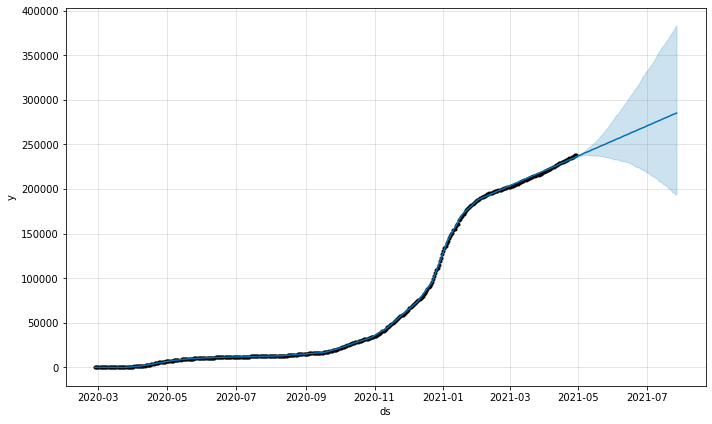

In [ ]:
print(prophet_c_recovery.plot(recovery_forecast))

Figure(648x432)


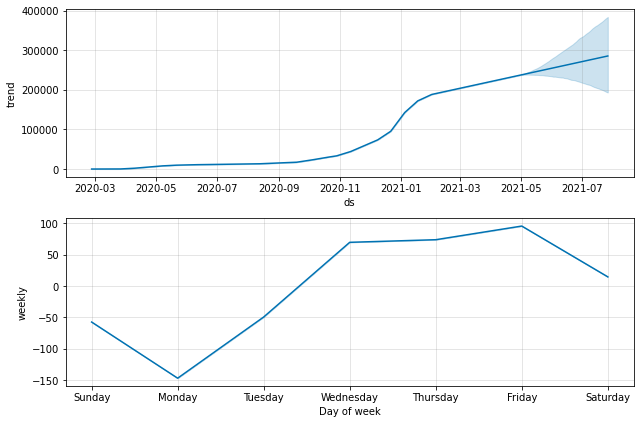

In [ ]:
print(prophet_c_recovery.plot_components(recovery_forecast))

In [ ]:
recovery_prediction["Prophet's Prediction"]=list(recovery_forecast["yhat"].tail(89))
recovery_prediction["Prophet's Upper Bound"]=list(recovery_forecast["yhat_upper"].tail(89))
recovery_prediction["Prophet's Lower Bound"]=list(recovery_forecast["yhat_lower"].tail(89))
recovery_prediction.head()

,Dates,Polynonmial Regression Prediction for Recovery,Holt Linear Model Prediction,Prophet's Prediction,Prophet's Upper Bound,Prophet's Lower Bound
0,2021-04-30,314131.9073,239862.6040,236849.5777,238176.2124,235587.7641
1,2021-05-01,316373.3561,240564.1020,237320.2433,238707.9870,236158.8368
2,2021-05-02,318624.8700,241265.5999,237799.8367,239060.2055,236486.6881
3,2021-05-03,320886.4692,241967.0979,238261.9425,239690.0051,237022.4590
4,2021-05-04,323158.1743,242668.5958,238911.0997,240357.4086,237355.9327


# Making predictions for Death Cases Using Polynomial Regression


In [ ]:
train_ml=data1.iloc[:int(data1.shape[0]*0.95)]             #spliting our dataset to train and testing sets
test_ml=data1.iloc[int(data1.shape[0]*0.95):]
model_scores=[]

In [ ]:
poly = PolynomialFeatures(degree =3) 

In [ ]:
train_poly=poly.fit_transform(np.array(train_ml["days"]).reshape(-1,1))
test_poly=poly.fit_transform(np.array(test_ml["days"]).reshape(-1,1))
y=train_ml["total_deaths"]

In [ ]:
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
prediction_poly=linreg.predict(test_poly)
rmse_poly=np.sqrt(mean_squared_error(test_ml["total_deaths"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  879.3955566384608


In [ ]:
computing_data=poly.fit_transform(np.array(data1["days"]).reshape(-1,1))
plt.figure(figsize=(10,5))
predictions_poly=linreg.predict(computing_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=data1.index, y=data1["total_deaths"],
                    mode='lines+markers',name="Train Data for Deaths Cases"))
fig.add_trace(go.Scatter(x=data1.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Total Deaths Polynomial Regression Prediction",
                 xaxis_title="Days",yaxis_title="Deaths Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 720x360 with 0 Axes>

In [ ]:
#predicting for next 3 months 
#start=data1['date'].iloc[-1]
new_date_deaths=[]
new_date_poly_deaths=[]
new_prediction_deaths_poly=[]
for i in range(1,90):
    new_date_deaths.append(data1['date'].iloc[-1]+timedelta(days=i))
    new_date_poly_deaths=poly.fit_transform(np.array(data1["days"].max()+i).reshape(-1,1))
    new_prediction_deaths_poly.append(linreg.predict(new_date_poly_deaths)[0])

In [ ]:
deaths_prediction=pd.DataFrame(zip(new_date_deaths,new_prediction_deaths_poly),
                               columns=["Dates","Polynonmial Regression Prediction for Deaths"])
deaths_prediction.head()

,Dates,Polynonmial Regression Prediction for Deaths
0,2021-04-30,3651.2393
1,2021-05-01,3681.2594
2,2021-05-02,3711.4836
3,2021-05-03,3741.9127
4,2021-05-04,3772.5473


In [ ]:
#prediction for next 30 days
#using ploynomial regression
computing_data=poly.fit_transform(np.array(data1["days"]).reshape(-1,1))
plt.figure(figsize=(10,5))
predictions_poly_deaths=linreg.predict(computing_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=data1['date'], y=data1["total_deaths"],
                    mode='lines+markers',name="Train Data for Confirmed Deaths"))
fig.add_trace(go.Scatter(x=data1['date'], y=predictions_poly_deaths,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.add_trace(go.Scatter(x=deaths_prediction['Dates'], y=deaths_prediction['Polynonmial Regression Prediction for Deaths'],
                    mode='lines',name="Polynomial Regression Best Fit for next 30 days",
                    line=dict(color='red', dash='dot')))
fig.update_layout(title="Deaths Cases Polynomial Regression Prediction",
                 xaxis_title="Days",yaxis_title="Deaths Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 720x360 with 0 Axes>

# Making predictions for Deaths Cases Using Holt's Model

In [ ]:
train_ml=data1.iloc[:int(data1.shape[0]*0.95)]
test_ml=data1.iloc[int(data1.shape[0]*0.95):]
y_pred_deaths=test_ml.copy()
model_scores=[]

In [ ]:
holt=Holt(np.asarray(train_ml["total_deaths"])).fit(smoothing_level=0.4, smoothing_slope=0.4,optimized=False) 

In [ ]:
y_pred_deaths["Holt"]=holt.forecast(len(test_ml))
model_scores.append(np.sqrt(mean_squared_error(y_pred_deaths["total_deaths"],y_pred_deaths["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(y_pred_deaths["total_deaths"],y_pred_deaths["Holt"])))

Root Mean Square Error Holt's Linear Model:  3.5288833316819495


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=train_ml.index, y=train_ml["total_deaths"],
                    mode='lines+markers',name="Train Data for Deaths Cases"))

fig.add_trace(go.Scatter(x=test_ml.index, y=test_ml["total_deaths"],
                    mode='lines+markers',name="Validation Data for Deaths Cases",))

fig.add_trace(go.Scatter(x=test_ml.index, y=y_pred_deaths["Holt"],
                    mode='lines+markers',name="Prediction of Deaths Cases",))

fig.update_layout(title="Deaths Cases Holt's Linear Model Prediction",
                 xaxis_title="Date",yaxis_title="Deaths Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
#making prediction for next 3 months
holt_new_prediction_deaths=[]
for i in range(1,90):
    holt_new_prediction_deaths.append(holt.forecast((len(test_ml)+i))[-1])
deaths_prediction["Holt Linear Model Prediction"]=holt_new_prediction_deaths
deaths_prediction.head()

,Dates,Polynonmial Regression Prediction for Deaths,Holt Linear Model Prediction
0,2021-04-30,3651.2393,2480.4512
1,2021-05-01,3681.2594,2482.3953
2,2021-05-02,3711.4836,2484.3394
3,2021-05-03,3741.9127,2486.2836
4,2021-05-04,3772.5473,2488.2277


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=data1['date'], y=data1["total_deaths"],
                    mode='lines+markers',name="Train Data for Deaths Cases"))

fig.add_trace(go.Scatter(x=deaths_prediction['Dates'], y=deaths_prediction['Holt Linear Model Prediction'],
                    mode='lines',name="Prediction for next 30 days",
                    line=dict(color='blue', dash='dot')))

fig.update_layout(title="Deaths Cases Holt's Linear Model Prediction",
                 xaxis_title="Date",yaxis_title="Deaths Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

# Making predictions for Deaths Cases Using fbProphet Model

In [ ]:
prophet_c_deaths=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_deaths=pd.DataFrame(zip(list(data1['date']),list(data1["total_deaths"])),columns=['ds','y'])

In [ ]:
prophet_c_deaths.fit(prophet_deaths)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast_c_deaths=prophet_c_deaths.make_future_dataframe(periods=89)
forecast_deaths=forecast_c_deaths.copy()

In [ ]:
deaths_forecast=prophet_c_deaths.predict(forecast_c_deaths)

In [ ]:
model_scores=[]
model_scores.append(np.sqrt(mean_squared_error(data1["total_deaths"],deaths_forecast['yhat'].head(data1.shape[0]))))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(data1["total_deaths"],deaths_forecast['yhat'].head(data1.shape[0]))))

Root Mean Squared Error for Prophet Model:  15.729666834802025


Figure(720x432)


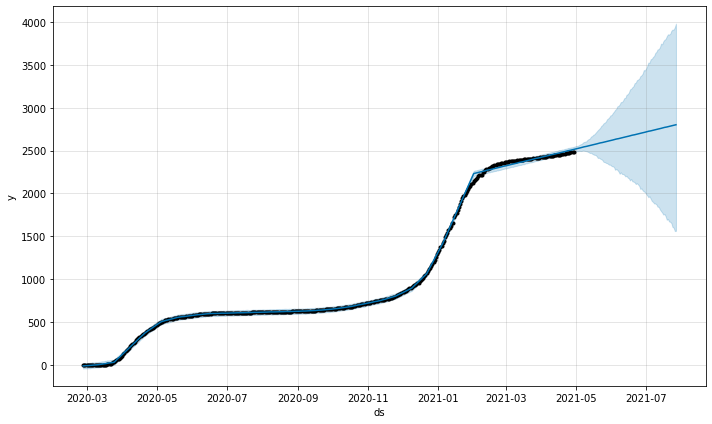

In [ ]:
print(prophet_c_deaths.plot(deaths_forecast))

Figure(648x432)


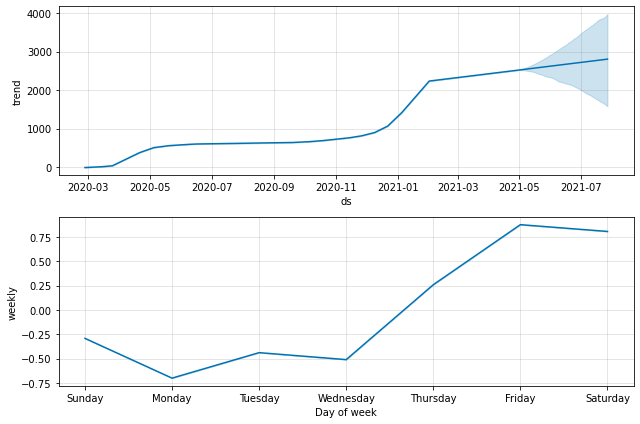

In [ ]:
print(prophet_c_deaths.plot_components(deaths_forecast))

In [ ]:
deaths_prediction["Prophet's Prediction"]=list(deaths_forecast["yhat"].tail(89))
deaths_prediction["Prophet's Upper Bound"]=list(deaths_forecast["yhat_upper"].tail(89))
deaths_prediction["Prophet's Lower Bound"]=list(deaths_forecast["yhat_lower"].tail(89))
deaths_prediction.head()

,Dates,Polynonmial Regression Prediction for Deaths,Holt Linear Model Prediction,Prophet's Prediction,Prophet's Upper Bound,Prophet's Lower Bound
0,2021-04-30,3651.2393,2480.4512,2518.1217,2548.1656,2487.8349
1,2021-05-01,3681.2594,2482.3953,2521.2857,2553.5658,2492.2369
2,2021-05-02,3711.4836,2484.3394,2523.4229,2554.3110,2492.0313
3,2021-05-03,3741.9127,2486.2836,2526.2485,2558.1686,2494.5125
4,2021-05-04,3772.5473,2488.2277,2529.7432,2566.2730,2497.8379


# Making predictions for Active cases using polynomial Regression

In [ ]:
train_ml=data1.iloc[:int(data1.shape[0]*0.95)]             #spliting our dataset to train and testing sets
test_ml=data1.iloc[int(data1.shape[0]*0.95):]
model_scores=[]

In [ ]:
poly = PolynomialFeatures(degree =5) 

In [ ]:
train_poly=poly.fit_transform(np.array(train_ml["days"]).reshape(-1,1))
test_poly=poly.fit_transform(np.array(test_ml["days"]).reshape(-1,1))
y=train_ml["active_cases"]

In [ ]:
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
prediction_poly=linreg.predict(test_poly)
rmse_poly=np.sqrt(mean_squared_error(test_ml["active_cases"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  4933.000717018239


In [ ]:
computing_data=poly.fit_transform(np.array(data1["days"]).reshape(-1,1))
plt.figure(figsize=(10,5))
predictions_poly=linreg.predict(computing_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=data1.index, y=data1["active_cases"],
                    mode='lines+markers',name="Train Data for Active Cases"))
fig.add_trace(go.Scatter(x=data1.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Active Cases Polynomial Regression Prediction",
                 xaxis_title="Days",yaxis_title="Active Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 720x360 with 0 Axes>

In [ ]:
#predicting for next 3 months 
#start=data1['date'].iloc[-1]
new_date_active=[]
new_date_poly_active=[]
new_prediction_active_poly=[]
for i in range(1,90):
    new_date_active.append(data1['date'].iloc[-1]+timedelta(days=i))
    new_date_poly_active=poly.fit_transform(np.array(data1["days"].max()+i).reshape(-1,1))
    new_prediction_active_poly.append(linreg.predict(new_date_poly_active)[0])

In [ ]:
active_prediction=pd.DataFrame(zip(new_date_active,new_prediction_active_poly,),
                               columns=["Dates","Polynonmial Regression Prediction for Active Cases"])
active_prediction.head()

,Dates,Polynonmial Regression Prediction for Active Cases
0,2021-04-30,5976.0631
1,2021-05-01,6187.9021
2,2021-05-02,6416.6894
3,2021-05-03,6662.8317
4,2021-05-04,6926.7403


In [ ]:
#prediction for next 30 days
#using ploynomial regression
computing_data=poly.fit_transform(np.array(data1["days"]).reshape(-1,1))
plt.figure(figsize=(10,5))
predictions_poly_active=linreg.predict(computing_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=data1['date'], y=data1["active_cases"],
                    mode='lines+markers',name="Train Data for Active Cases"))
fig.add_trace(go.Scatter(x=data1['date'], y=predictions_poly_active,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.add_trace(go.Scatter(x=active_prediction['Dates'], y=active_prediction['Polynonmial Regression Prediction for Active Cases'],
                    mode='lines',name="Polynomial Regression Best Fit for next 3 months",
                    line=dict(color='red', dash='dot')))
fig.update_layout(title="Active Cases Polynomial Regression Prediction",
                 xaxis_title="Days",yaxis_title="Active Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 720x360 with 0 Axes>

# Making predictions for Active cases using Holt's model

In [ ]:
train_ml=data1.iloc[:int(data1.shape[0]*0.95)]
test_ml=data1.iloc[int(data1.shape[0]*0.95):]
y_pred_active=test_ml.copy()
model_scores=[]

In [ ]:
holt=Holt(np.asarray(train_ml["active_cases"])).fit(smoothing_level=0.4, smoothing_slope=0.4,optimized=False) 

In [ ]:
y_pred_active["Holt"]=holt.forecast(len(test_ml))
model_scores.append(np.sqrt(mean_squared_error(y_pred_active["active_cases"],y_pred_active["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(y_pred_active["active_cases"],y_pred_active["Holt"])))

Root Mean Square Error Holt's Linear Model:  1902.5347848920312


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=train_ml.index, y=train_ml["active_cases"],
                    mode='lines+markers',name="Train Data for active Cases"))

fig.add_trace(go.Scatter(x=test_ml.index, y=test_ml["active_cases"],
                    mode='lines+markers',name="Validation Data for active Cases",))

fig.add_trace(go.Scatter(x=test_ml.index, y=y_pred_active["Holt"],
                    mode='lines+markers',name="Prediction of active Cases",))

fig.update_layout(title="active Cases Holt's Linear Model Prediction",
                 xaxis_title="Date",yaxis_title="active Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
#making prediction for next 3 months
holt_new_prediction_active=[]
for i in range(1,90):
    holt_new_prediction_active.append(holt.forecast((len(test_ml)+i))[-1])
active_prediction["Holt Linear Model Prediction"]=holt_new_prediction_active
active_prediction.head(10)

,Dates,Polynonmial Regression Prediction for Active Cases,Holt Linear Model Prediction
0,2021-04-30,5976.0631,7041.5557
1,2021-05-01,6187.9021,6928.8105
2,2021-05-02,6416.6894,6816.0653
3,2021-05-03,6662.8317,6703.3201
4,2021-05-04,6926.7403,6590.5749
5,2021-05-05,7208.8313,6477.8297
6,2021-05-06,7509.5256,6365.0844
7,2021-05-07,7829.2486,6252.3392
8,2021-05-08,8168.4306,6139.5940
9,2021-05-09,8527.5068,6026.8488


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=data1['date'], y=data1["active_cases"],
                    mode='lines+markers',name="Train Data for Active Cases"))

fig.add_trace(go.Scatter(x=active_prediction['Dates'], y=active_prediction['Holt Linear Model Prediction'],
                    mode='lines',name="Prediction for next 30 days",
                    line=dict(color='blue', dash='dot')))

fig.update_layout(title="Active Cases Holt's Linear Model Prediction",
                 xaxis_title="Date",yaxis_title="Active Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

# Making predictions for Active cases using fbProphet Model

In [ ]:
prophet_c_active=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_active=pd.DataFrame(zip(list(data1['date']),list(data1["active_cases"])),columns=['ds','y'])

In [ ]:
prophet_active

,ds,y
0,2020-02-27,1.0000
1,2020-02-28,1.0000
2,2020-02-29,3.0000
3,2020-03-01,4.0000
4,2020-03-02,4.0000
...,...,...
420,2021-04-25,10218.0000
421,2021-04-26,10383.0000
422,2021-04-27,10239.0000
423,2021-04-28,10244.0000


In [ ]:
prophet_c_active.fit(prophet_active)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast_c_active=prophet_c_recovery.make_future_dataframe(periods=89)
forecast_active=forecast_c_active.copy()

In [ ]:
active_forecast=prophet_c_active.predict(forecast_c_active)

In [ ]:
model_scores=[]
model_scores.append(np.sqrt(mean_squared_error(data1["active_cases"],active_forecast['yhat'].head(data1.shape[0]))))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(data1["active_cases"],active_forecast['yhat'].head(data1.shape[0]))))

Root Mean Squared Error for Prophet Model:  5197.33383742124


Figure(720x432)


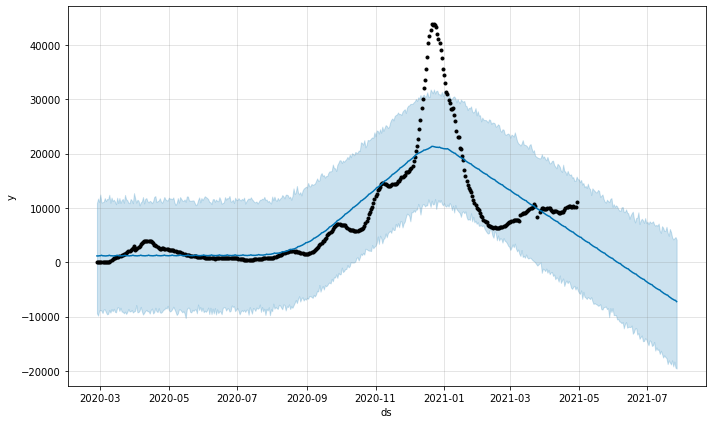

In [ ]:
print(prophet_c_active.plot(active_forecast))

Figure(648x432)


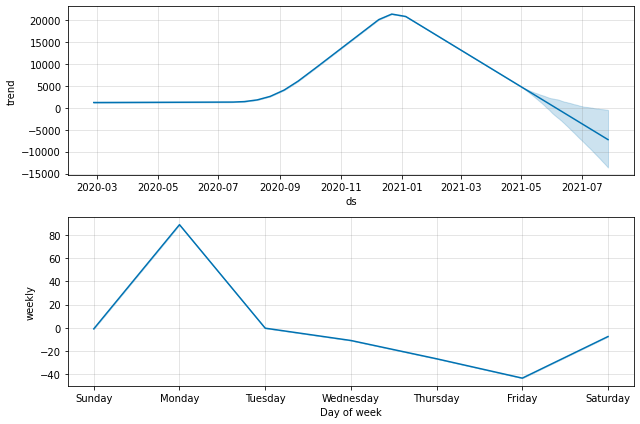

In [ ]:
print(prophet_c_active.plot_components(active_forecast))

In [ ]:
active_prediction["Prophet's Prediction"]=list(active_forecast["yhat"].tail(89))
active_prediction["Prophet's Upper Bound"]=list(active_forecast["yhat_upper"].tail(89))
active_prediction["Prophet's Lower Bound"]=list(active_forecast["yhat_lower"].tail(89))
active_prediction.head()

,Dates,Polynonmial Regression Prediction for Active Cases,Holt Linear Model Prediction,Prophet's Prediction,Prophet's Upper Bound,Prophet's Lower Bound
0,2021-04-30,5976.0631,7041.5557,4858.7302,15288.0160,-5157.5295
1,2021-05-01,6187.9021,6928.8105,4756.3727,15261.4198,-5613.3223
2,2021-05-02,6416.6894,6816.0653,4624.8413,14723.7824,-5826.7075
3,2021-05-03,6662.8317,6703.3201,4576.2977,15164.1720,-5188.0755
4,2021-05-04,6926.7403,6590.5749,4349.1204,14286.8365,-6754.8658


# Making predictions for Vaccination available using plynomial regression


In [ ]:
train_ml=vaccination_data.iloc[:int(vaccination_data.shape[0]*0.95)]
test_ml=vaccination_data.iloc[int(vaccination_data.shape[0]*0.95):]
y_pred=test_ml.copy()
model_scores_people_vaccinated=[]


In [ ]:
poly = PolynomialFeatures(degree =5)

In [ ]:
train_poly=poly.fit_transform(np.array(train_ml["days"]).reshape(-1,1))
test_poly=poly.fit_transform(np.array(test_ml["days"]).reshape(-1,1))
y_people_vaccinated=train_ml["people_vaccinated"]

In [ ]:
linreg_people_vaccinated=LinearRegression(normalize=True)
linreg_people_vaccinated.fit(train_poly,y_people_vaccinated)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
prediction_poly_people_vaccinated=linreg_people_vaccinated.predict(test_poly)
rmse_poly_people_vaccinated=np.sqrt(mean_squared_error(test_ml["people_vaccinated"],prediction_poly_people_vaccinated))
model_scores_people_vaccinated.append(rmse_poly_people_vaccinated)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly_people_vaccinated)

Root Mean Squared Error for Polynomial Regression:  164249.31568889978


In [ ]:
computing_data_for_people_vaccinated=poly.fit_transform(np.array(vaccination_data["days"]).reshape(-1,1))
plt.figure(figsize=(10,5))
predictions_poly_people_vaccinated=linreg_people_vaccinated.predict(computing_data)

fig=go.Figure()

fig.add_trace(go.Scatter(x=vaccination_data.index, y=vaccination_data["people_vaccinated"],
                    mode='lines+markers',name="Train Data for People Vaccinated"))
fig.add_trace(go.Scatter(x=vaccination_data.index, y=predictions_poly_people_vaccinated,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))


fig.update_layout(title="People Vaccinated Polynomial Regression Prediction",
                 xaxis_title="Days",yaxis_title="People Vaccinated",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 720x360 with 0 Axes>

In [ ]:
#predicting for next 3 months 
#start=vaccination_data['date'].iloc[-1]
new_date_=[]
new_date_poly_active=[]
new_prediction_people_vaccinated=[]
for i in range(1,90):
    new_date_.append(vaccination_data['date'].iloc[-1]+timedelta(days=i))
    new_date_poly_active=poly.fit_transform(np.array(vaccination_data["days"].max()+i).reshape(-1,1))
    new_prediction_people_vaccinated.append(linreg_people_vaccinated.predict(new_date_poly_active)[0])

In [ ]:
vaccination_prediction=pd.DataFrame(zip(new_date_,new_prediction_people_vaccinated,),
                               columns=["Dates","Polynonmial Regression Prediction for People Vaccinated"])
vaccination_prediction.head()

,Dates,Polynonmial Regression Prediction for People Vaccinated
0,2021-04-30,1650038.6443
1,2021-05-01,1723484.1578
2,2021-05-02,1801844.3536
3,2021-05-03,1885380.8861
4,2021-05-04,1974363.8646


In [ ]:
#prediction for next 30 days
#using ploynomial regression
computing_data=poly.fit_transform(np.array(vaccination_data["days"]).reshape(-1,1))
plt.figure(figsize=(10,5))
predictions_poly_people_vaccinated_=linreg_people_vaccinated.predict(computing_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=vaccination_data['date'], y=vaccination_data["people_vaccinated"],
                    mode='lines+markers',name="Train Data for Vaccination Cases"))
fig.add_trace(go.Scatter(x=vaccination_data['date'], y=predictions_poly_people_vaccinated_,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.add_trace(go.Scatter(x=vaccination_prediction['Dates'], y=vaccination_prediction['Polynonmial Regression Prediction for People Vaccinated'],
                    mode='lines',name="Polynomial Regression Best Fit for next 3 months",
                    line=dict(color='red', dash='dot')))


fig.update_layout(title="Vaccination Cases Polynomial Regression Prediction",
                 xaxis_title="Days",yaxis_title="Vaccination Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 720x360 with 0 Axes>

# Making predictions for Vaccination available using Holt's Model


In [ ]:
train_ml=vaccination_data.iloc[:int(vaccination_data.shape[0]*0.95)]
test_ml=vaccination_data.iloc[int(vaccination_data.shape[0]*0.95):]
y_pred=test_ml.copy()
model_scores=[]

In [ ]:
holt=Holt(np.asarray(train_ml["people_vaccinated"])).fit(smoothing_level=0.4, smoothing_slope=0.4,optimized=False) 

In [ ]:
y_pred["Holt"]=holt.forecast(len(test_ml))
model_scores.append(np.sqrt(mean_squared_error(y_pred["people_vaccinated"],y_pred["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(y_pred["people_vaccinated"],y_pred["Holt"])))

Root Mean Square Error Holt's Linear Model:  13908.039266550328


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=train_ml.index, y=train_ml["people_vaccinated"],
                    mode='lines+markers',name="Train Data for vaccination Cases"))

fig.add_trace(go.Scatter(x=test_ml.index, y=test_ml["people_vaccinated"],
                    mode='lines+markers',name="Validation Data for vaccination Cases",))

fig.add_trace(go.Scatter(x=test_ml.index, y=y_pred["Holt"],
                    mode='lines+markers',name="Prediction of vaccination Cases",))

fig.update_layout(title="vaccination Cases Holt's Linear Model Prediction",
                 xaxis_title="Date",yaxis_title="vaccination Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
#making prediction for next 3 months
holt_new_prediction_vaccinated=[]
for i in range(1,90):
    holt_new_prediction_vaccinated.append(holt.forecast((len(test_ml)+i))[-1])
vaccination_prediction["Holt Linear Model Prediction"]=holt_new_prediction_vaccinated
vaccination_prediction.head()

,Dates,Polynonmial Regression Prediction for People Vaccinated,Holt Linear Model Prediction
0,2021-04-30,1650038.6443,1326293.2378
1,2021-05-01,1723484.1578,1346709.7201
2,2021-05-02,1801844.3536,1367126.2024
3,2021-05-03,1885380.8861,1387542.6848
4,2021-05-04,1974363.8646,1407959.1671


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=vaccination_data['date'], y=vaccination_data["people_vaccinated"],
                    mode='lines+markers',name="Train Data for Vaccination Cases"))

fig.add_trace(go.Scatter(x=vaccination_prediction['Dates'], y=vaccination_prediction['Holt Linear Model Prediction'],
                    mode='lines',name="Prediction for next 30 days",
                    line=dict(color='blue', dash='dot')))

fig.update_layout(title="Vaccination Cases Holt's Linear Model Prediction",
                 xaxis_title="Date",yaxis_title="Vaccination Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

# Making predictions for Vaccination available using fbProphet Model

In [ ]:
prophet_c_vaccination=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_vaccination=pd.DataFrame(zip(list(vaccination_data['date']),list(vaccination_data["people_vaccinated"])),columns=['ds','y'])

In [ ]:
prophet_vaccination

,ds,y
0,2020-12-27,6366
1,2020-12-28,8384
2,2020-12-29,17190
3,2020-12-30,28451
4,2020-12-31,34504
...,...,...
119,2021-04-25,1222243
120,2021-04-26,1253730
121,2021-04-27,1280282
122,2021-04-28,1304345


In [ ]:
prophet_c_vaccination.fit(prophet_vaccination)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast_c_vaccination=prophet_c_vaccination.make_future_dataframe(periods=89)
forecast_vaccination=forecast_c_vaccination.copy()

In [ ]:
vaccination_forecast=prophet_c_vaccination.predict(forecast_c_vaccination)

In [ ]:
model_scores=[]
model_scores.append(np.sqrt(mean_squared_error(vaccination_data["people_vaccinated"],active_forecast['yhat'].head(vaccination_data.shape[0]))))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(vaccination_data["people_vaccinated"],active_forecast['yhat'].head(vaccination_data.shape[0]))))

Root Mean Squared Error for Prophet Model:  600670.7500373581


Figure(720x432)


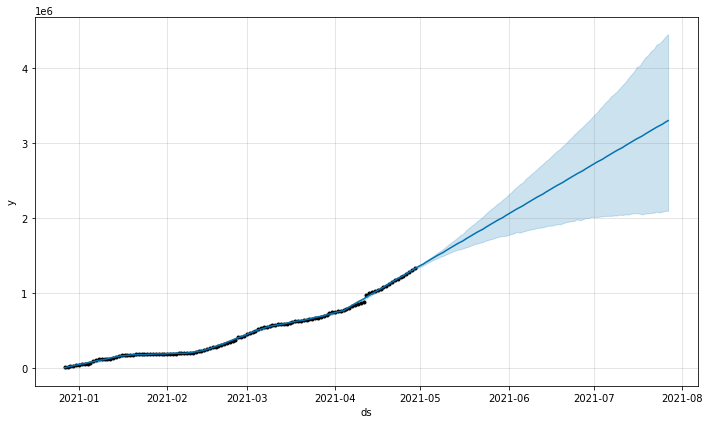

In [ ]:
print(prophet_c_vaccination.plot(vaccination_forecast))

Figure(648x432)


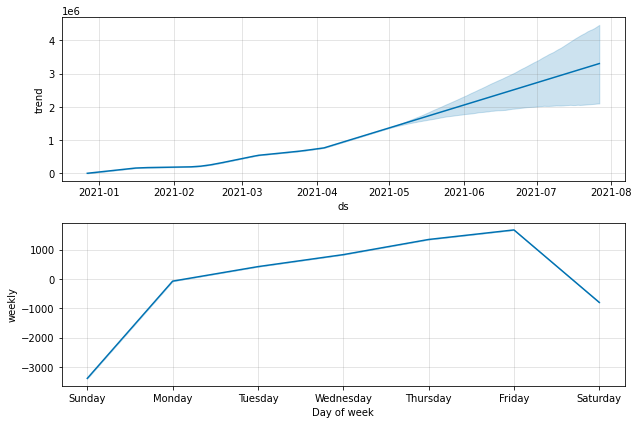

In [ ]:
print(prophet_c_vaccination.plot_components(vaccination_forecast))

In [ ]:
vaccination_prediction["Prophet's Prediction"]=list(vaccination_forecast["yhat"].tail(89))
vaccination_prediction["Prophet's Upper Bound"]=list(vaccination_forecast["yhat_upper"].tail(89))
vaccination_prediction["Prophet's Lower Bound"]=list(vaccination_forecast["yhat_lower"].tail(89))
vaccination_prediction.head()

,Dates,Polynonmial Regression Prediction for People Vaccinated,Holt Linear Model Prediction,Prophet's Prediction,Prophet's Upper Bound,Prophet's Lower Bound
0,2021-04-30,1650038.6443,1326293.2378,1346056.5138,1364688.9486,1328863.8283
1,2021-05-01,1723484.1578,1346709.7201,1365822.0750,1383818.4377,1349148.2872
2,2021-05-02,1801844.3536,1367126.2024,1385471.1879,1404016.9881,1366775.0748
3,2021-05-03,1885380.8861,1387542.6848,1411025.4576,1430921.7617,1390648.9689
4,2021-05-04,1974363.8646,1407959.1671,1433759.0699,1455960.6256,1411162.4831
